In [4]:
import hddm
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
!pwd

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [6]:
def preprocess_data(fname, load_dir):
    
    #load data
    all_data = hddm.load_csv(load_dir + fname)
    #select relevant variables
    processed_df = all_data[['p_id_accuracy', 'rt', 'condition', 'ID']] 
    #rename for hddm compatibility 
    processed_df = processed_df.rename(index=str, columns={"p_id_accuracy": "response", "ID": "subj_idx", "condition": "stim"})
    processed_df.columns = processed_df.columns.str.strip()
    processed_df['stim'] = processed_df['stim'].str.strip()   
    
    #not using this because data already cleaned
#     #clean data 
#     rtSig = processed_df.rt.std()
#     rtMu = processed_df.rt.mean()
#     cutoff =  rtMu - rtSig
#     processed_df = processed_df[processed_df.rt>cutoff]
#     processed_df.reset_index(drop=True, inplace=True)
    
    #flip sign of rt for errors 
    processed_df = hddm.utils.flip_errors(processed_df)
    
    #print dataframe 
    print(processed_df.head(3))
    
    #plot rt histogram 
    fig = plt.figure()
    ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
    for i, subj_data in processed_df.groupby('subj_idx'):
        subj_data.rt.hist(bins=20, histtype='step', ax=ax)

    #print unique subject ids, unique conditions, n_subjects  
    print(np.unique(processed_df.subj_idx), np.unique(processed_df.stim), len(np.unique(processed_df.subj_idx)))
    
    return processed_df 

In [5]:
def estimate_ddm_params(processed_df, write_dir,
                        depends_on={}, model_name='_model',
                        bias=True, include=['v', 't', 'a', 'z'], n_samples=3000, n_burned_samples=500, 
                        p_outlier=0, save_plots=True, save_stats=True, save_traces=False):
    
    #make directory for each model
    os.mkdir(model_dir+model_name)
    
    #which parameter is varying by condition?
    depends_on=depends_on
    
    #fit hddm model according to above 
    m=hddm.HDDM(processed_df, depends_on=depends_on, bias=bias, include=include, p_outlier=p_outlier)
    m.find_starting_values()
    
    if save_traces: 
        m.sample(n_samples, burn=n_burned_samples,
                 dbname=model_dir+model_name+'_traces.db', db='pickle')
    else: 
        m.sample(n_samples, burn=n_burned_samples)

    m.plot_posteriors(save=save_plots, path=model_dir+model_name+'/'+model_name+'_posteriors')

    if save_stats: 
        m.print_stats(model_dir+model_name+'/'+model_name+'_stats.csv')
        
    
    return m

### Test functions

In [7]:
!pwd
write_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/'
print(write_dir)
model_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/'
load_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
print(load_dir)
fname = 'combined_learning_sig_obs_data.csv'

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs
/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/
/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/


   response        rt stim  subj_idx
0       1.0  0.711570   hc       761
1       0.0 -0.681410   hc       761
2       1.0  0.767118   hc       761
[761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778
 779 780 781 782 783 784] ['hc' 'hv' 'lc' 'lv'] 24


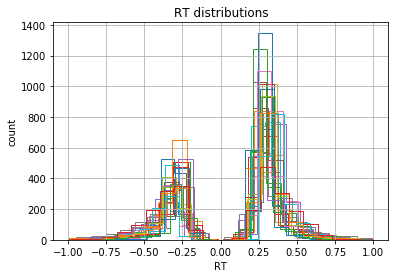

In [8]:
 processed_df=preprocess_data(fname,load_dir)

fitting  obs_a_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_a_alone


/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3001 of 3000 complete in 1100.5 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
fitting  obs_v_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_v_alone
 [-----------------100%-----------------] 3000 of 3000 complete in 973.0 secPlotting a
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t
Plotting t_std
Plotting z


/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting z_std
fitting  obs_tr_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_tr_alone
 [-----------------100%-----------------] 3000 of 3000 complete in 1108.5 secPlotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std
fitting  obs_z_alone  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_z_alone
 [-----------------100%-----------------] 3000 of 3000 complete in 1027.9 secPlotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(hc)
Plotting z(hv)
Plotting z(lc)
Plotting z(lv)
Plotting z_std


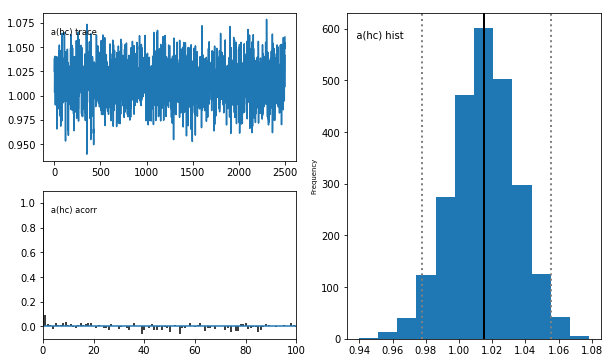

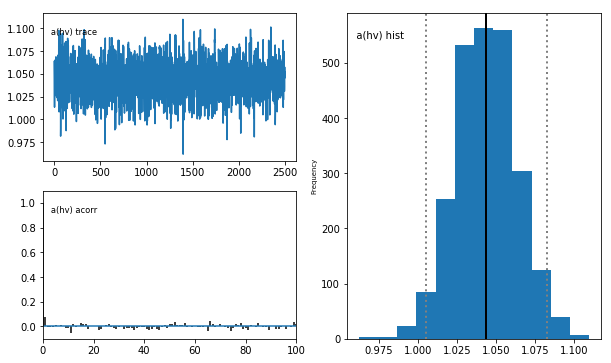

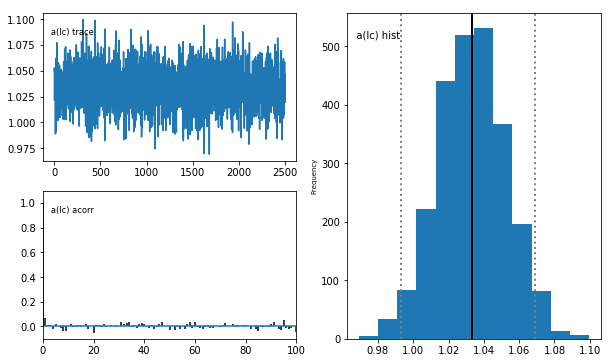

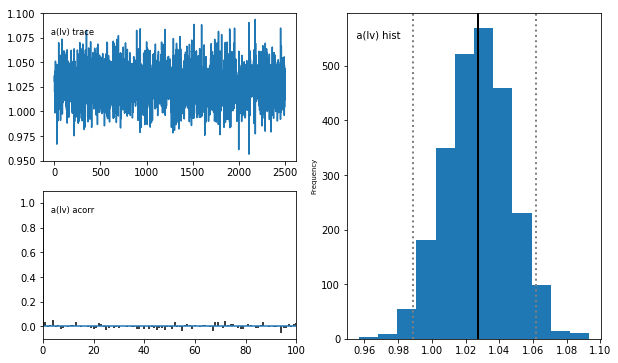

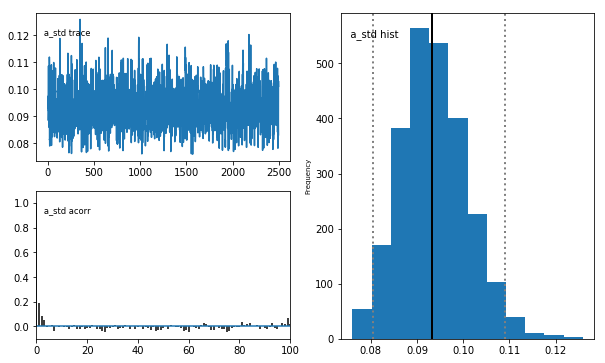

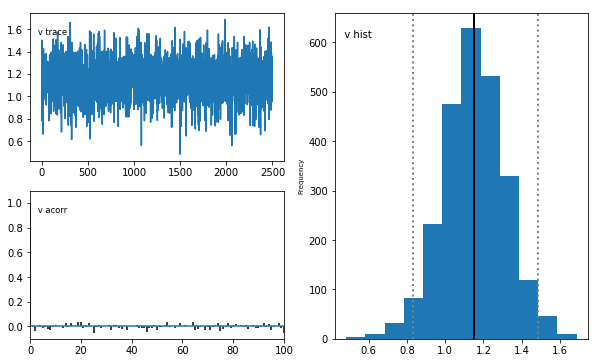

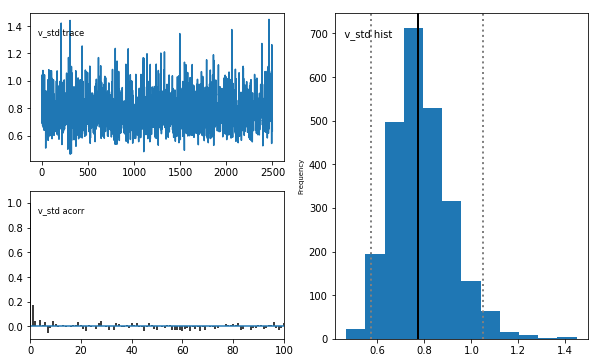

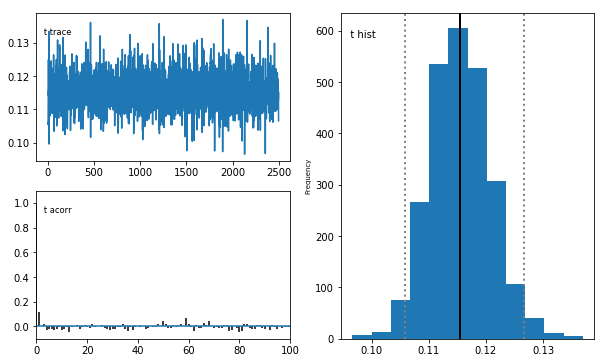

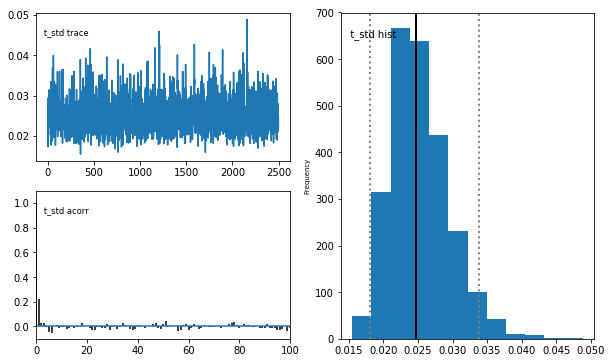

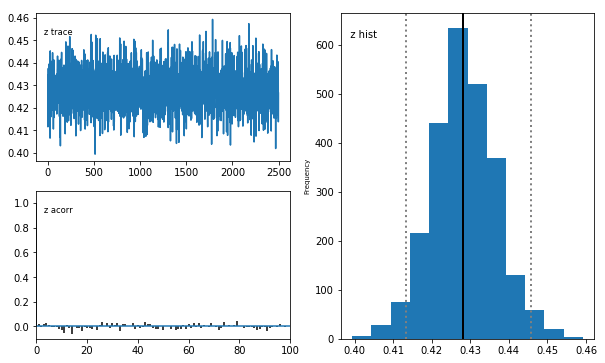

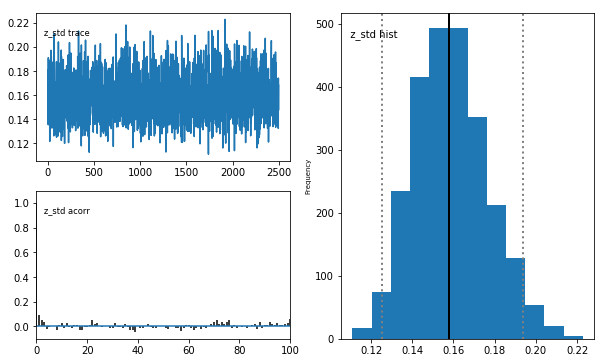

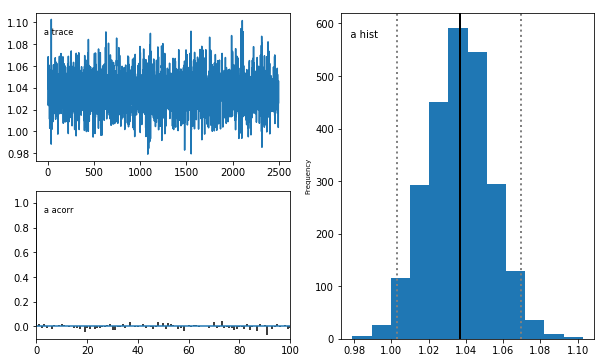

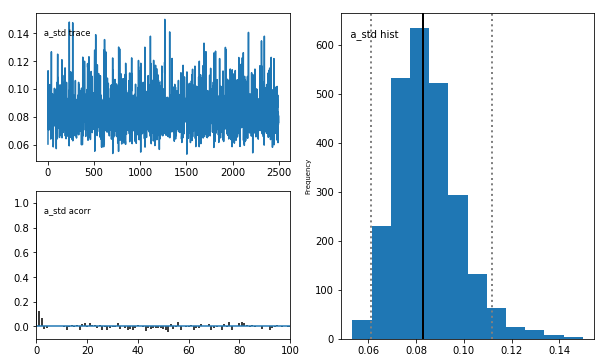

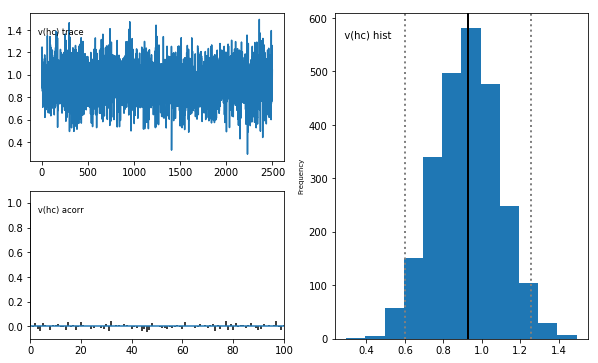

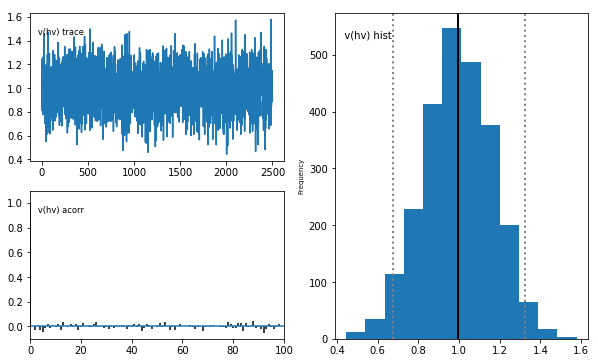

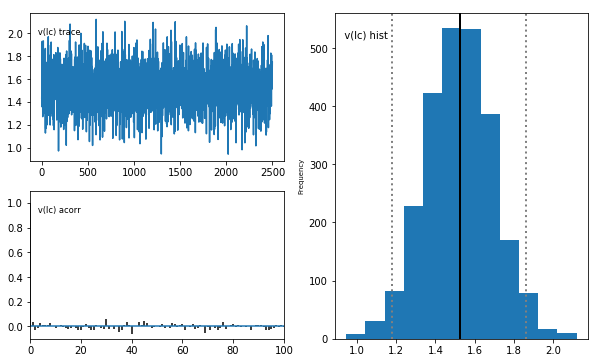

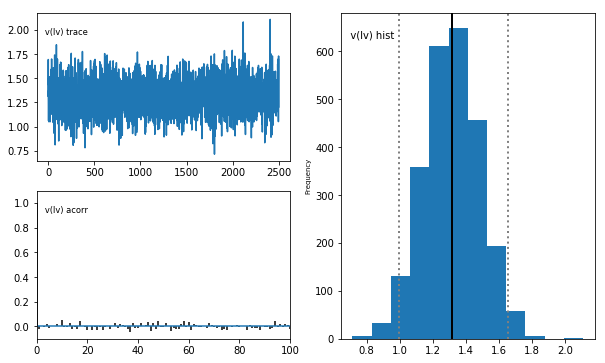

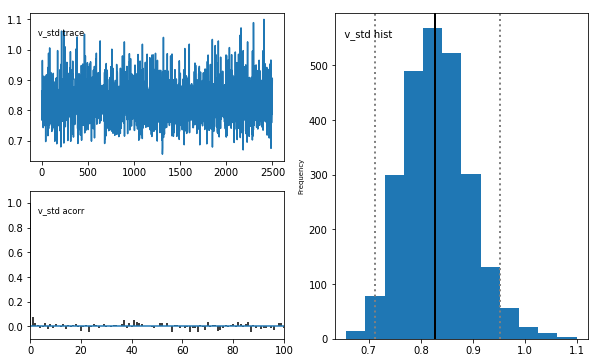

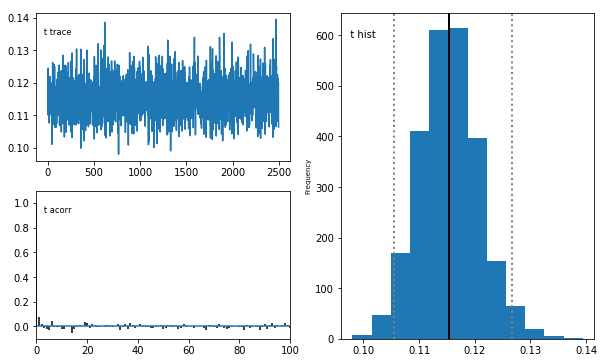

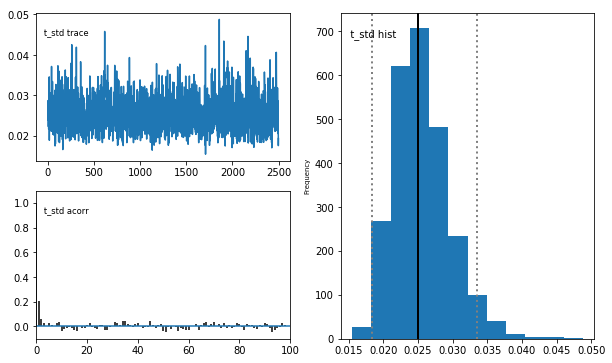

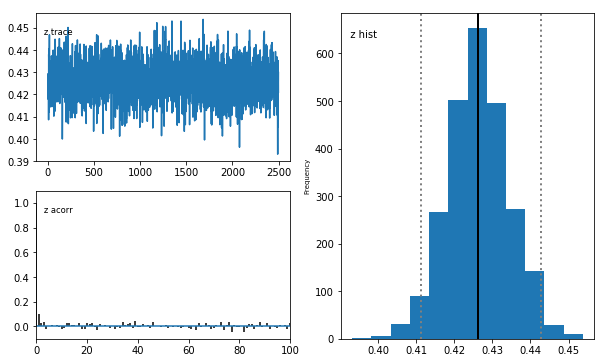

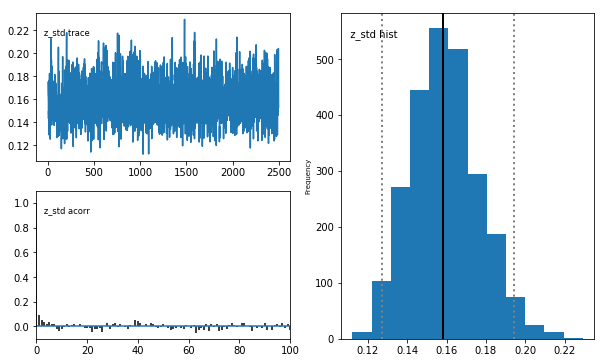

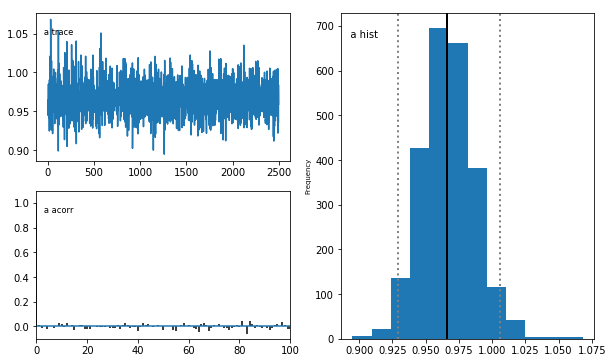

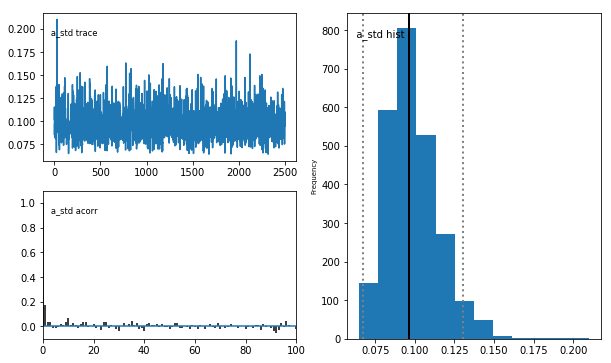

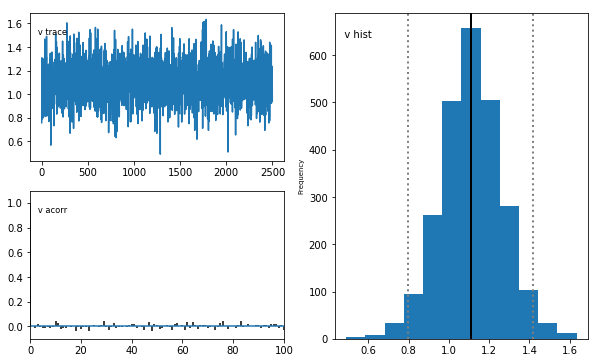

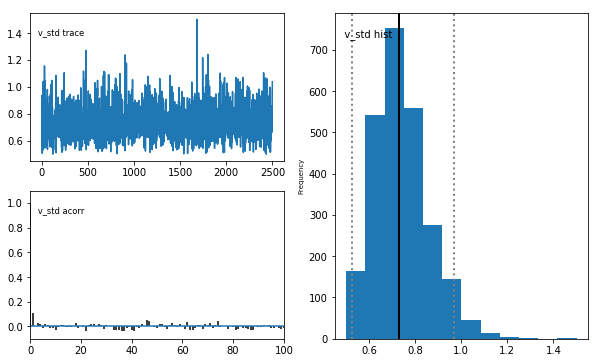

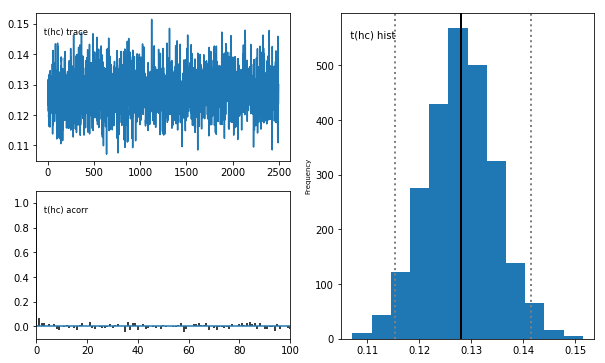

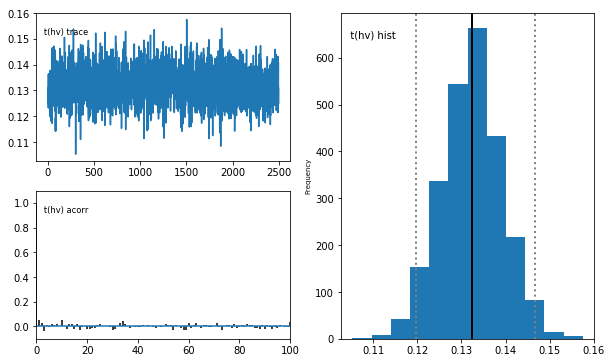

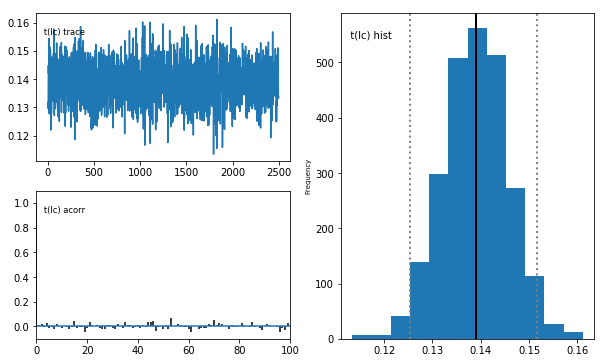

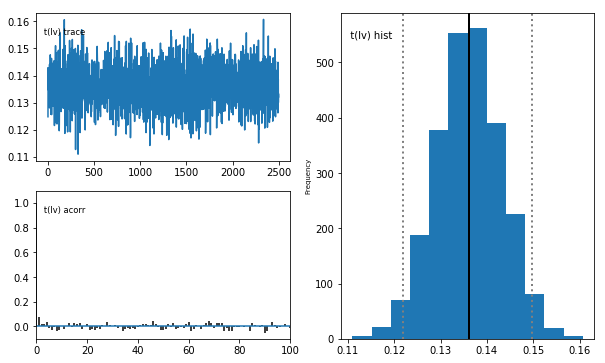

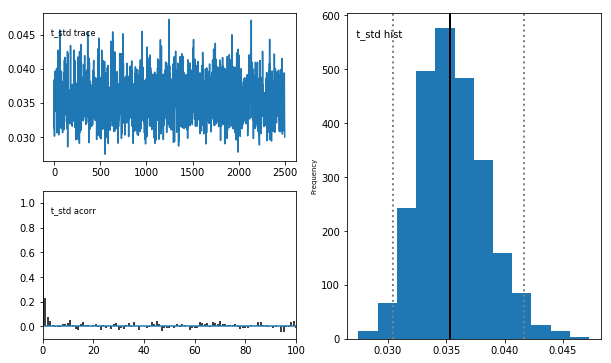

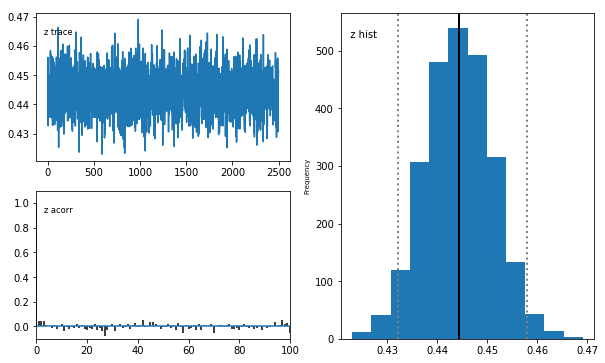

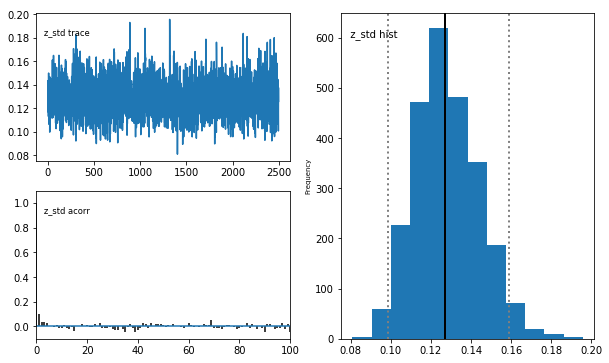

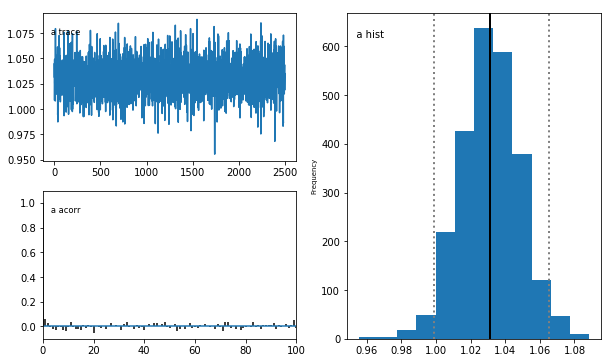

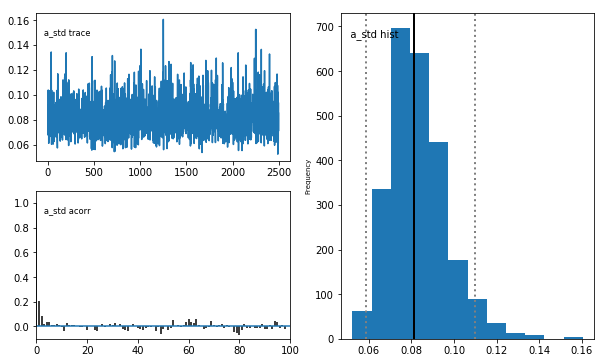

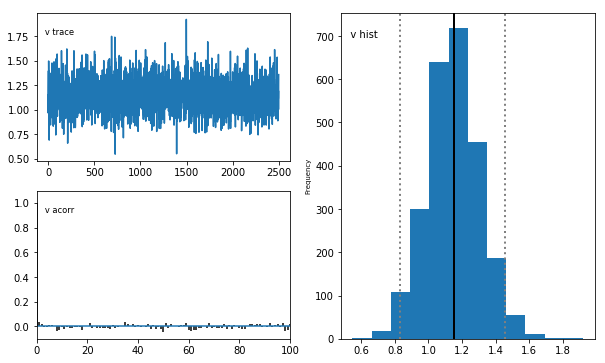

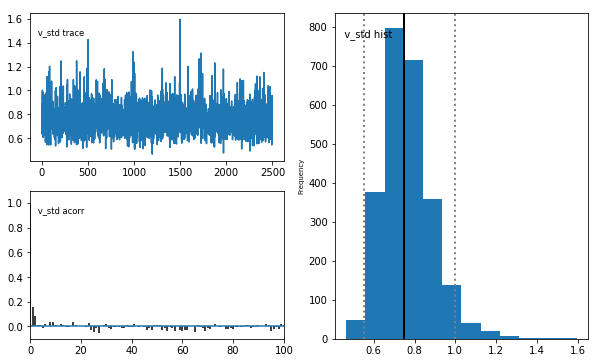

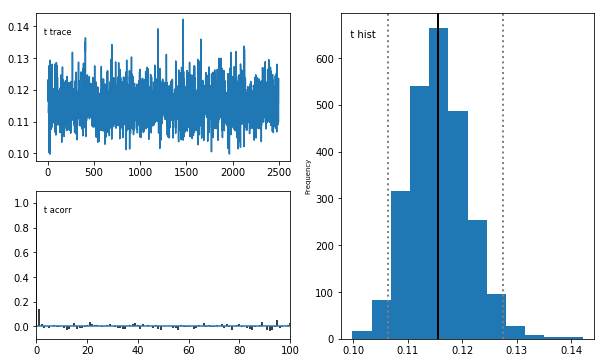

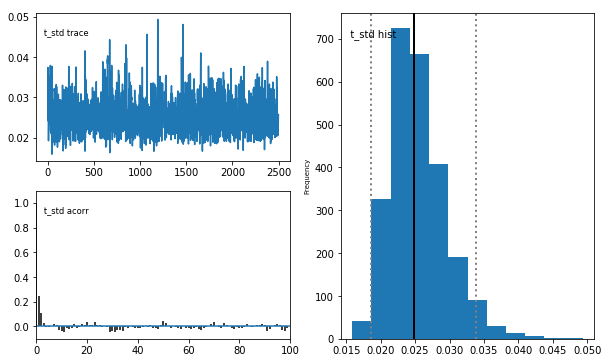

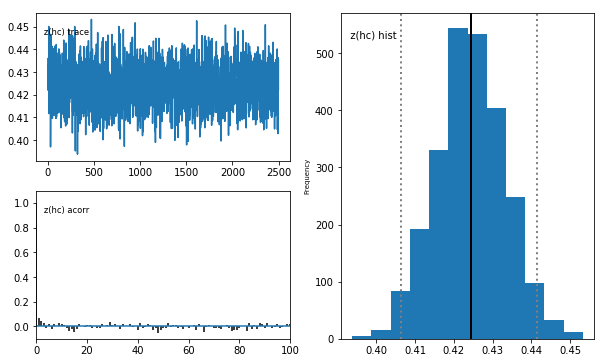

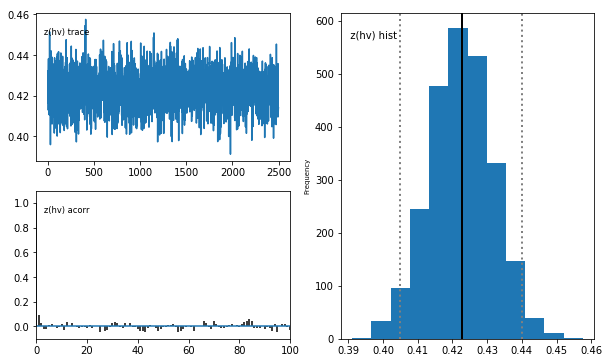

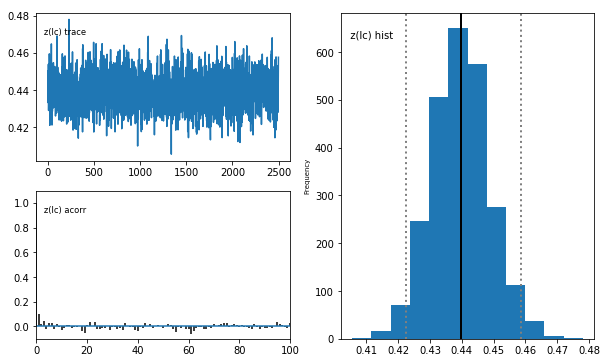

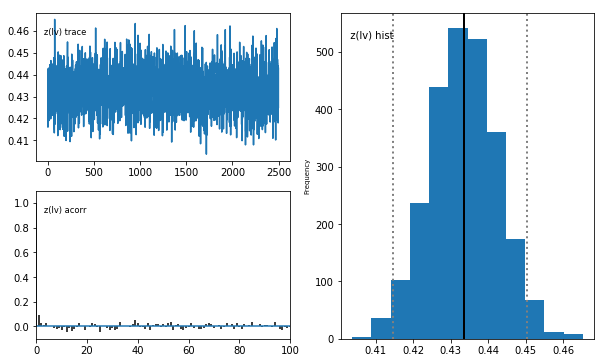

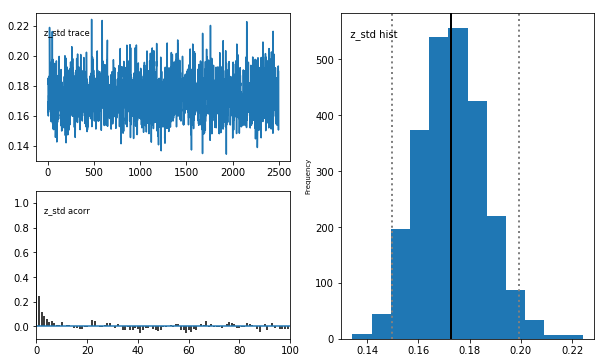

In [7]:
#single parameter models 
model_names=['obs_a_alone', 'obs_v_alone', 'obs_tr_alone', 'obs_z_alone']
parameters=[{'a':'stim'}, {'v':'stim'}, {'t':'stim'},{ 'z':'stim'}]
dics_single_param = []

#fit all parameters 
for model, parameter in zip(model_names, parameters):
    print('fitting ', model, ' model and saving to ', 
          model_dir+model)
    m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                        model_name=model, depends_on=parameter)
    dics_single_param.append(m.dic)


In [8]:
model_names_header = ', '.join(model_names)
print_dics_single_param = np.column_stack(dics_single_param)

In [9]:
np.savetxt(write_dir+'obs_dics/single_param_dics.csv', print_dics_single_param, header=model_names_header, delimiter=',',comments='')

In [10]:
single_param_dic_dir = write_dir+'obs_dics/single_param_dics.csv'
single_param_dics = pd.read_csv(single_param_dic_dir)
single_param_dics.columns = single_param_dics.columns.str.strip()

In [11]:
single_param_dics

obs_a_alone   obs_v_alone  obs_tr_alone   obs_z_alone
0 -18803.562705 -19878.794561 -26556.035625 -18228.155716

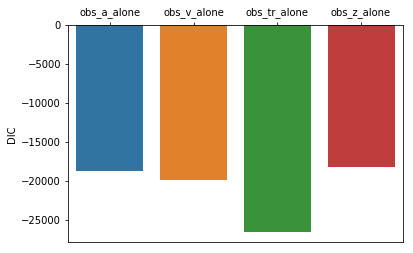

In [12]:
ax=sns.barplot(data=single_param_dics, order=model_names)
ax.set(ylabel='DIC')

# plt.ylim(-280000, -360000)
ax.xaxis.tick_top()
plt.show()

### Non-decision time is a meaningful parameter. 

{'t': 'stim', 'a': 'stim'}
fitting  obs_a_tr  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_a_tr


/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3000 of 3000 complete in 1058.2 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std
{'v': 'stim', 't': 'stim'}
fitting  obs_v_tr  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_v_tr
 [-----------------100%-----------------] 3001 of 3000 complete in 950.5 secPlotting a
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std


/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std
{'z': 'stim', 't': 'stim'}
fitting  obs_z_tr  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_z_tr
 [-----------------100%-----------------] 3000 of 3000 complete in 1038.8 secPlotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z(hc)
Plotting z(hv)
Plotting z(lc)
Plotting z(lv)
Plotting z_std


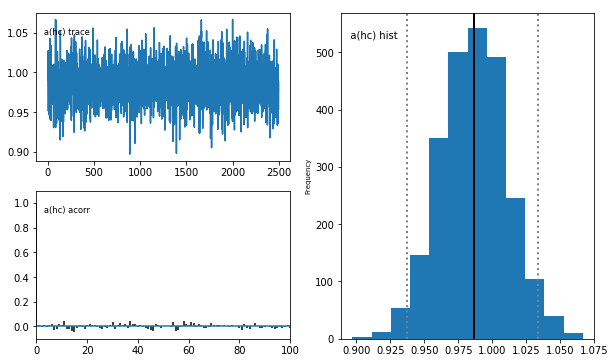

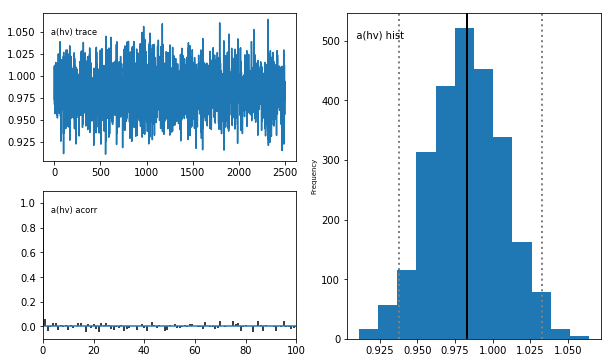

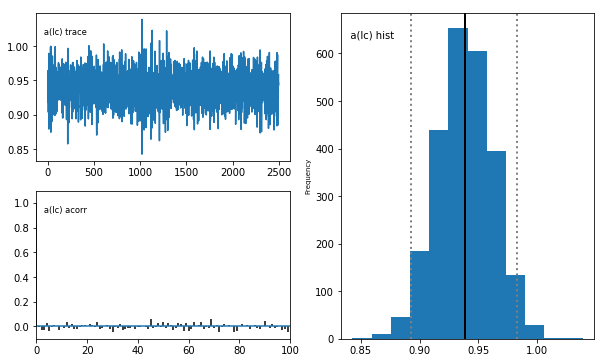

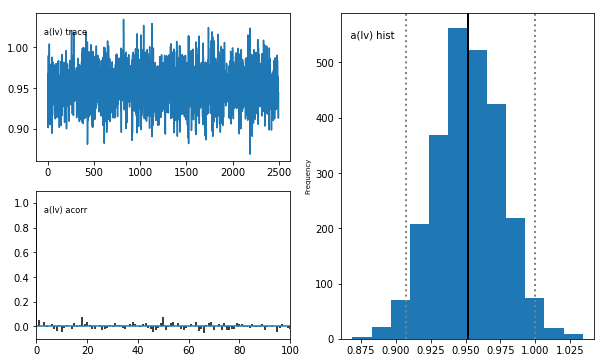

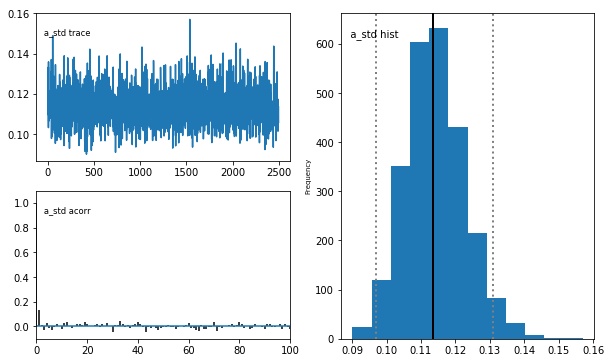

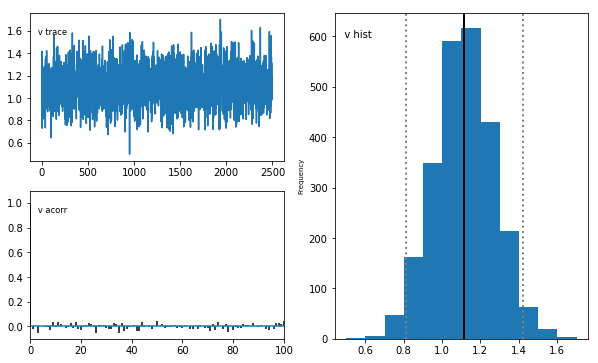

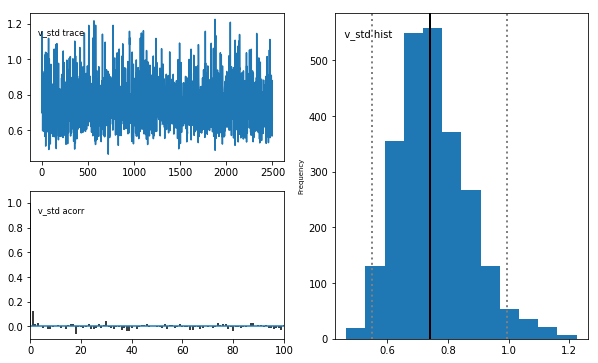

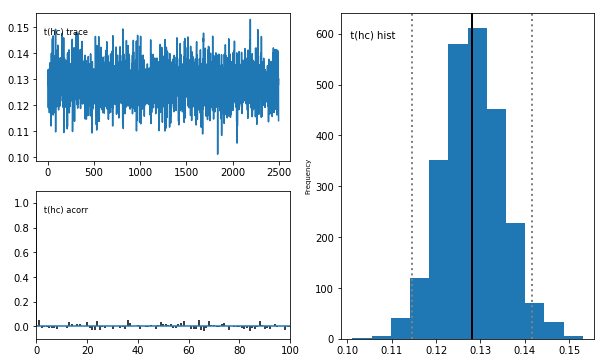

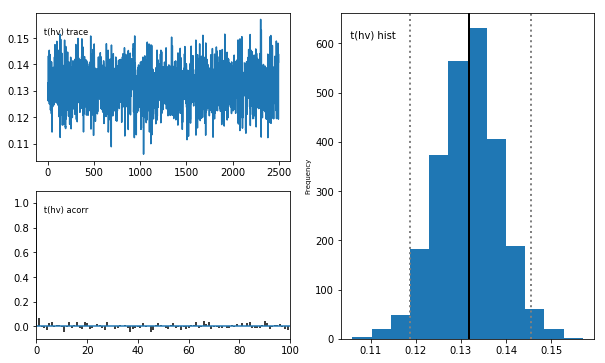

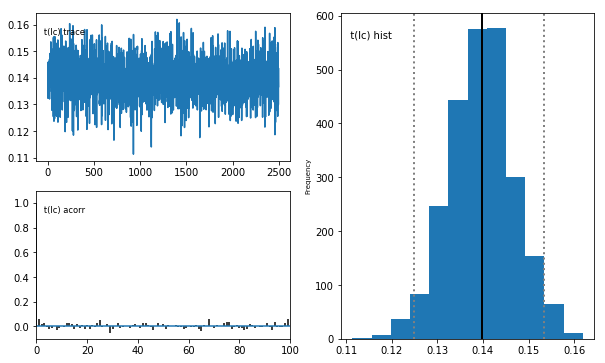

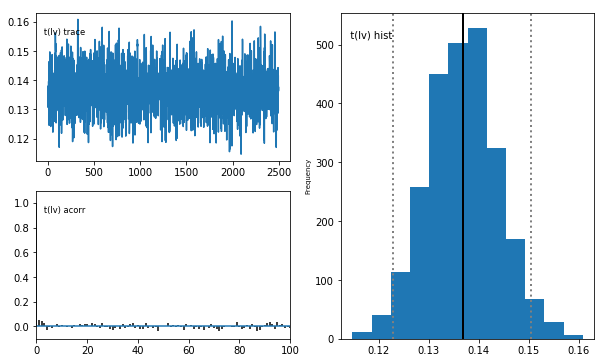

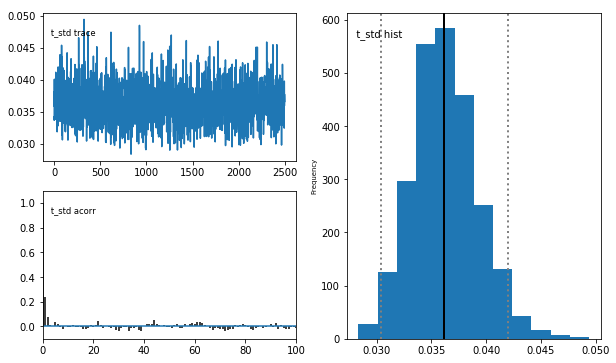

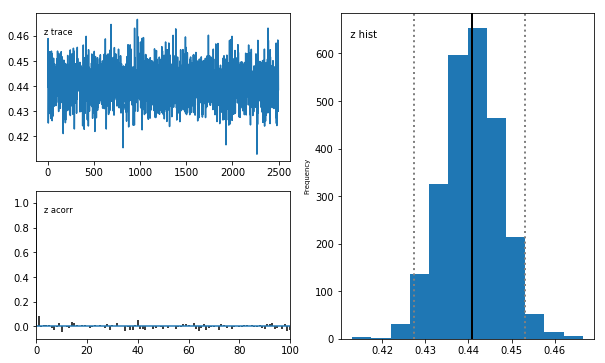

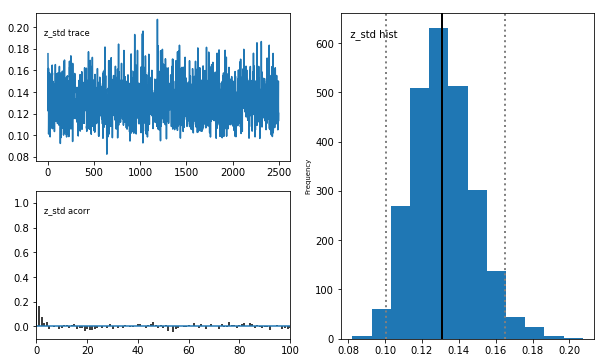

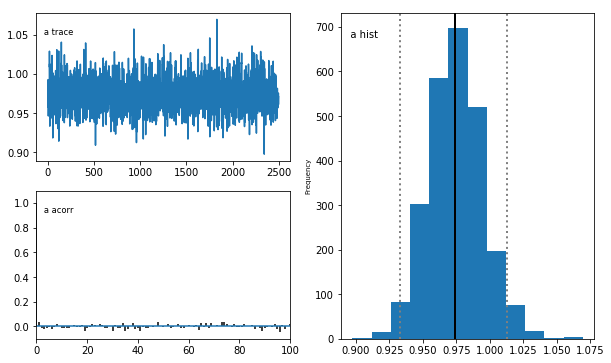

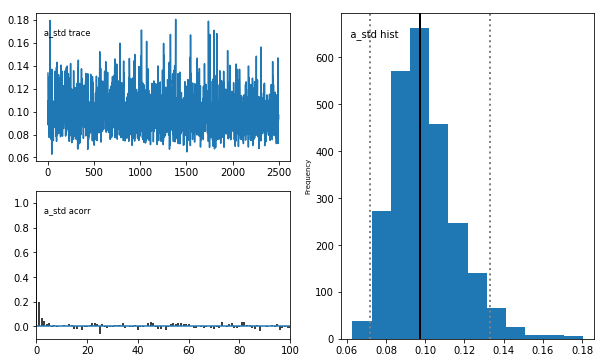

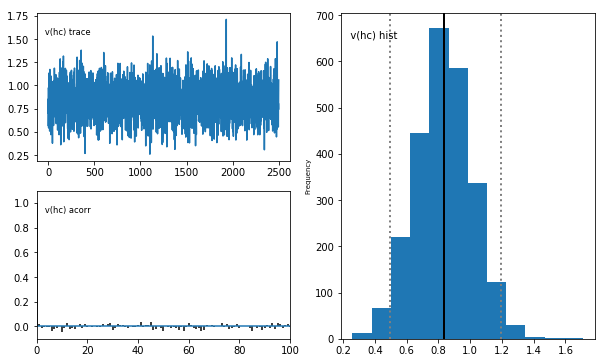

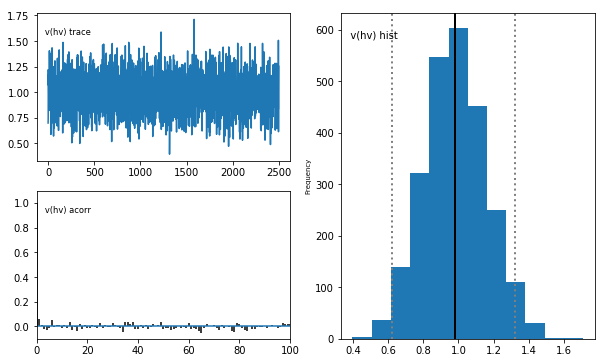

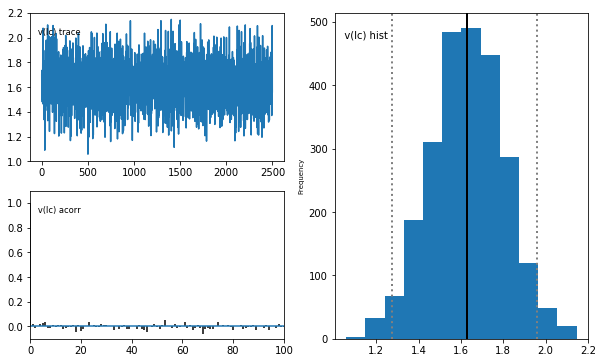

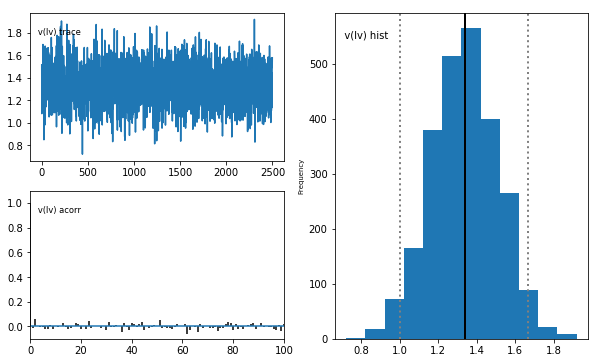

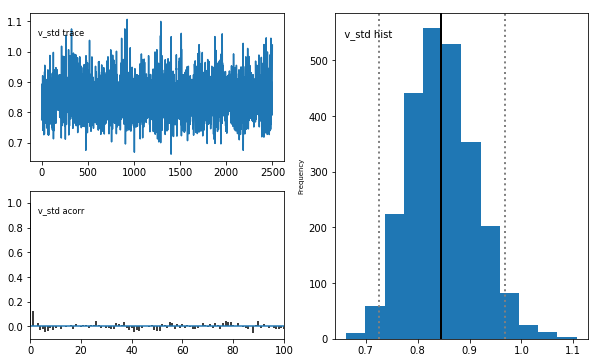

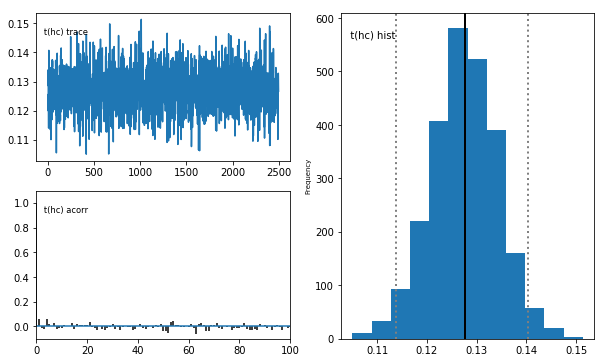

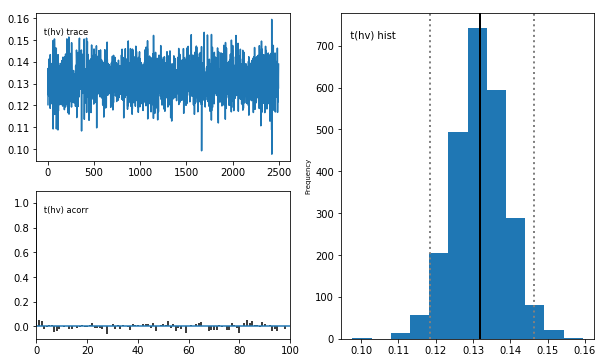

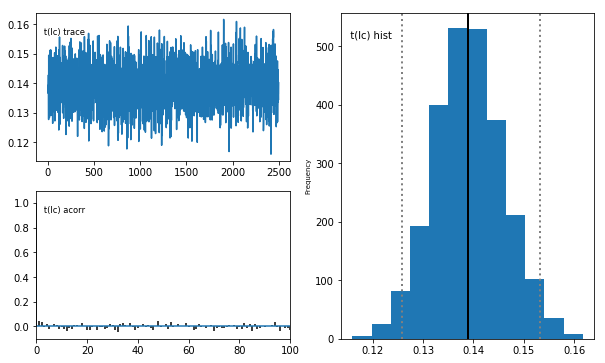

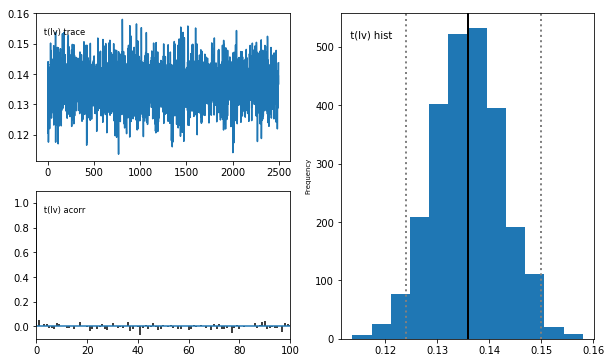

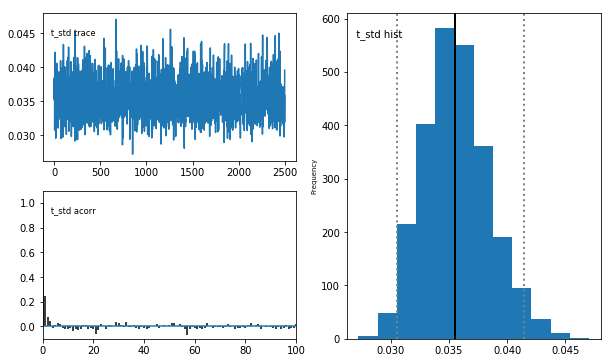

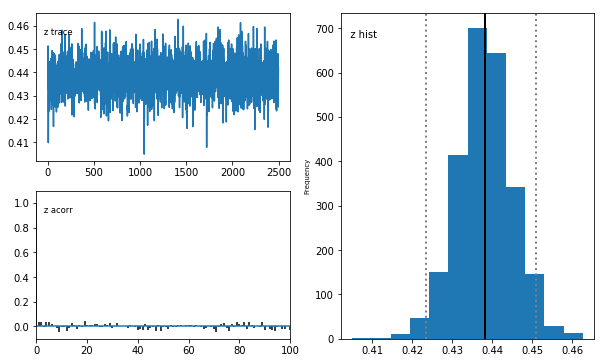

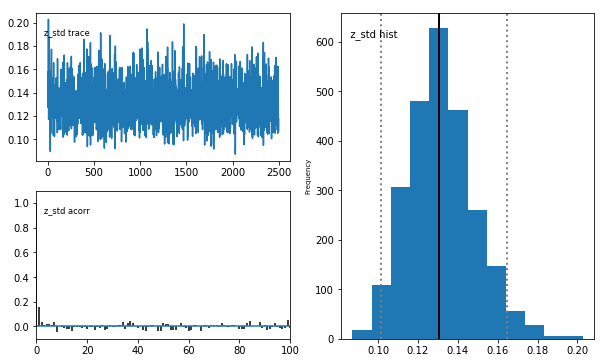

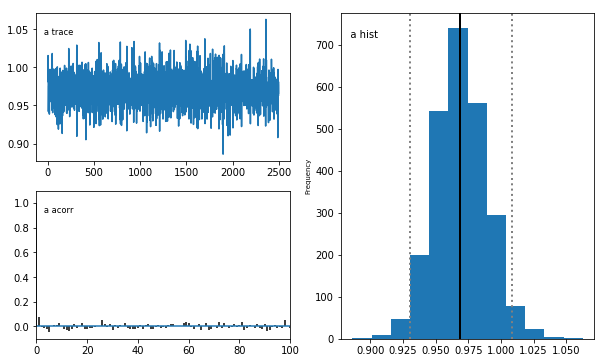

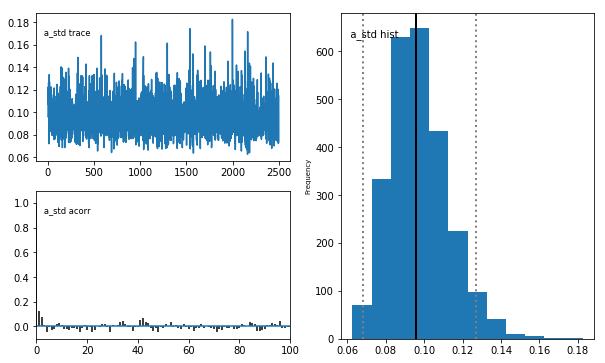

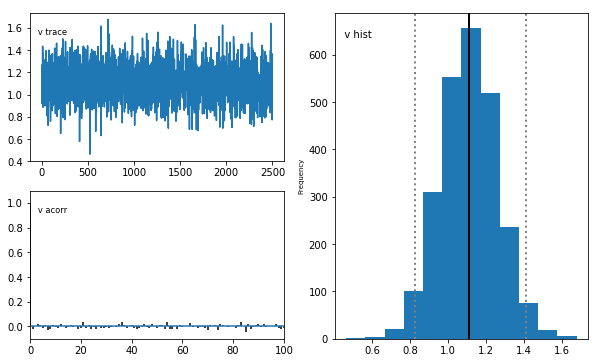

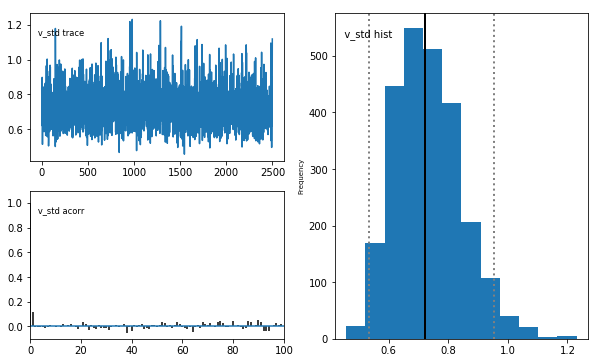

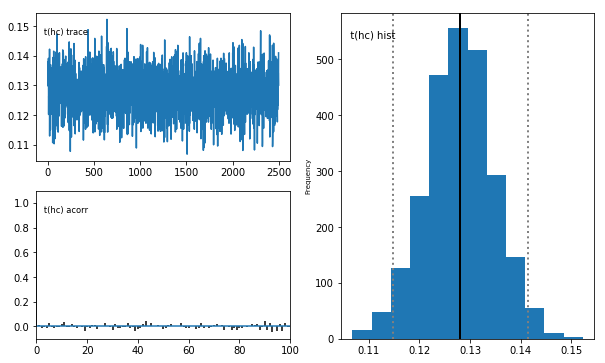

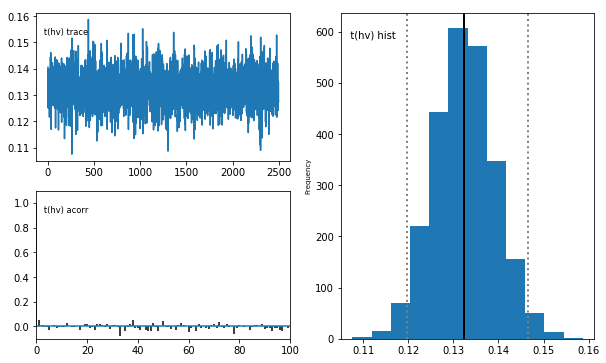

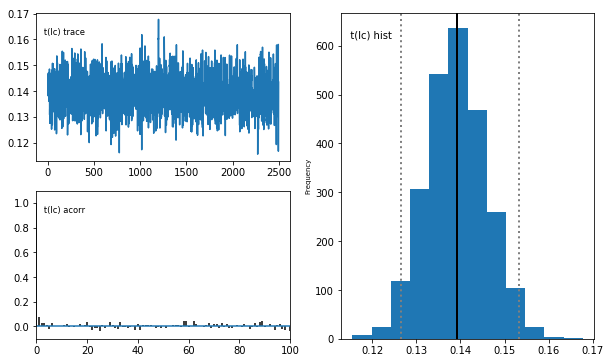

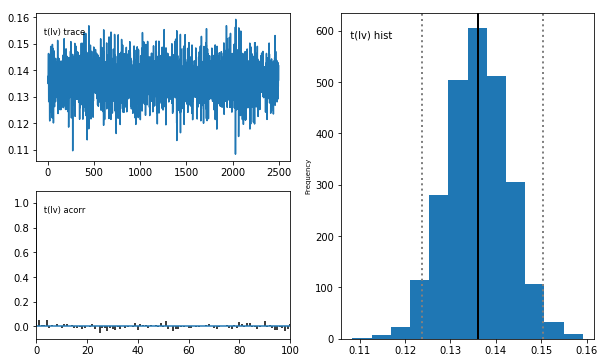

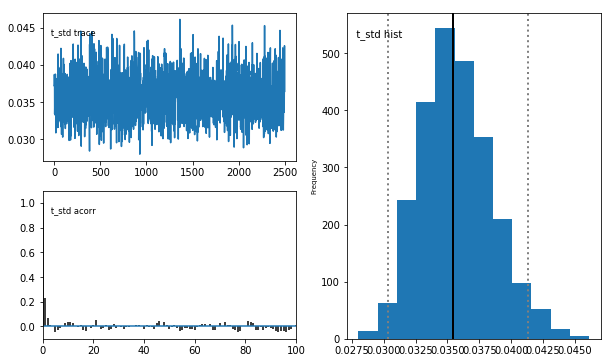

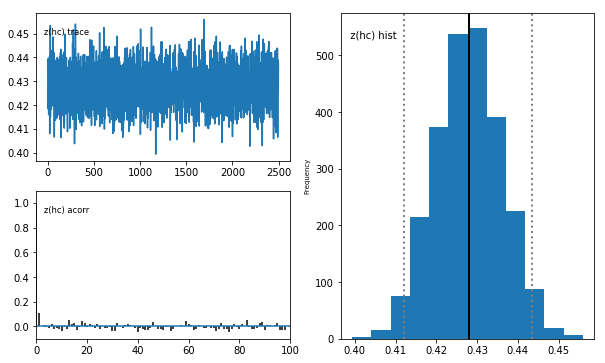

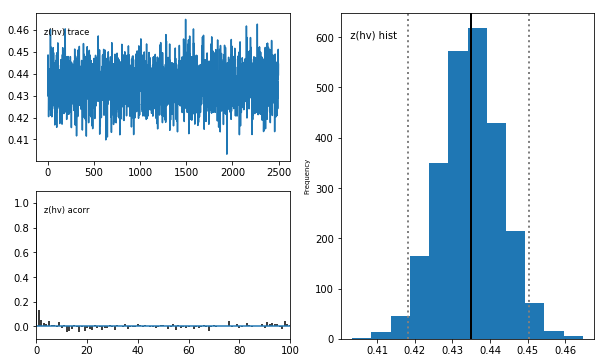

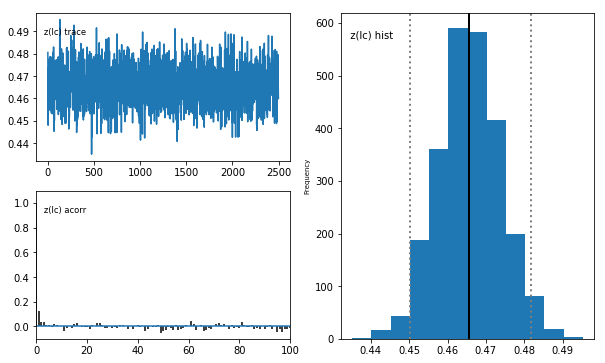

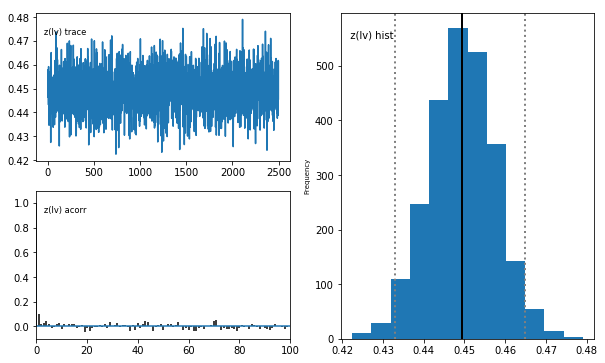

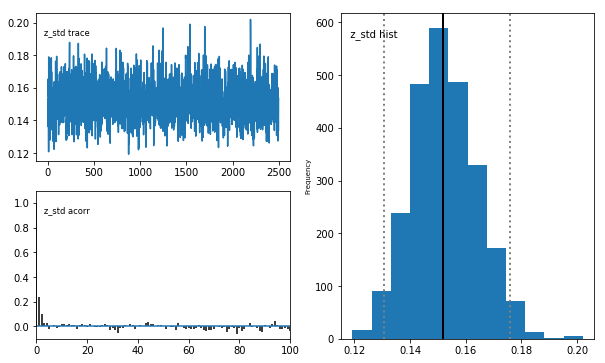

In [13]:
dual_param_model_names=['obs_a_tr', 'obs_v_tr', 'obs_z_tr']
parameters_dual_param=[{'a':'stim','t':'stim'}, {'v':'stim', 't':'stim'}, 
                       {'z':'stim', 't':'stim'}]
dics_dual_param = []

#fit all parameters 
for model, parameter in zip(dual_param_model_names, parameters_dual_param):
    print(parameter)
    print('fitting ', model, ' model and saving to ', 
          model_dir+model)
    m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                        model_name=model, depends_on=parameter)
    dics_dual_param.append(m.dic)


In [14]:
dual_param_model_names_header = ', '.join(dual_param_model_names)
print_dics_dual_param = np.column_stack(dics_dual_param)
np.savetxt(write_dir+'obs_dics/dual_param_dics.csv', print_dics_dual_param, header=dual_param_model_names_header, delimiter=',',comments='')

In [15]:
dics_dual_param

[-27702.061692945594, -28743.071809892539, -26886.792236453075]

In [16]:
np.argmin(dics_dual_param)

1

In [17]:
dual_param_dic_dir = write_dir+'obs_dics/dual_param_dics.csv'
dual_param_dics = pd.read_csv(dual_param_dic_dir)
dual_param_dics.columns = dual_param_dics.columns.str.strip()

In [18]:
dual_param_dics

obs_a_tr     obs_v_tr      obs_z_tr
0 -27702.061693 -28743.07181 -26886.792236

### Drift and threshold + non-decision time appear to explain data better than starting point bias + non-decision time. 

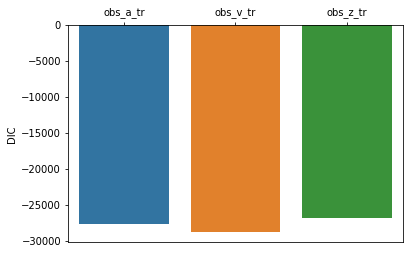

In [19]:
ax=sns.barplot(data=dual_param_dics, order=dual_param_model_names)
ax.set(ylabel='DIC')

# plt.ylim(-21000, -19000)
ax.xaxis.tick_top()
plt.show()

{'v': 'stim', 't': 'stim', 'a': 'stim'}
fitting  obs_a_v_tr  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_a_v_tr


/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3000 of 3000 complete in 1027.7 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std
{'z': 'stim', 'v': 'stim', 't': 'stim'}
fitting  obs_z_v_tr  model and saving to  /Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/observed/obs_models/obs_z_v_tr
 [-----------------100%-----------------] 3001 of 3000 complete in 1099.9 secPlotting a
Plotting a_std
Plotting v(hc)
Plotting v(hv)


/anaconda3/envs/hddm/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z(hc)
Plotting z(hv)
Plotting z(lc)
Plotting z(lv)
Plotting z_std


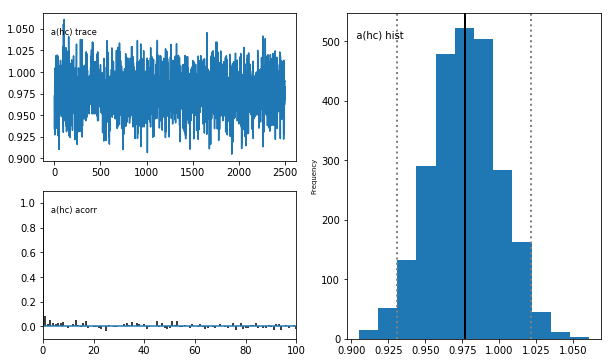

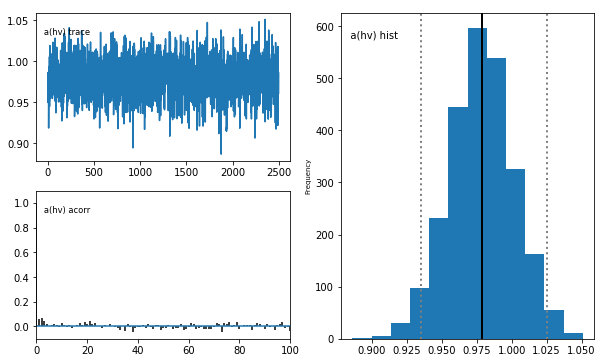

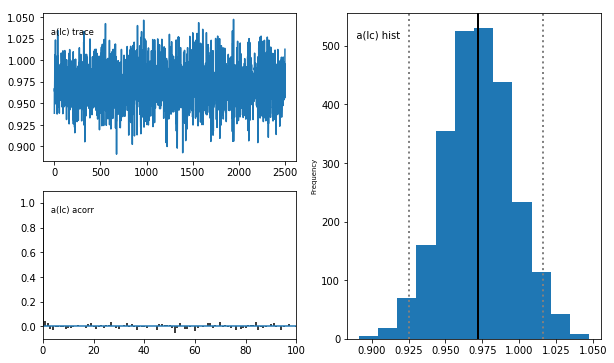

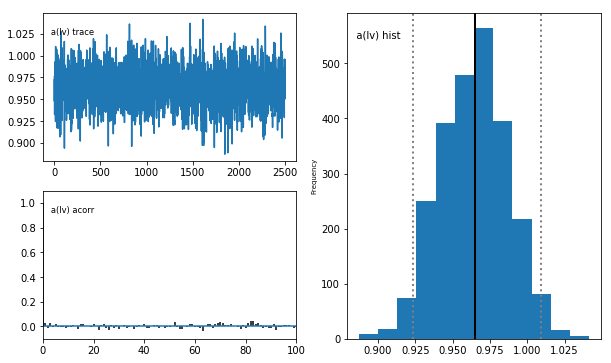

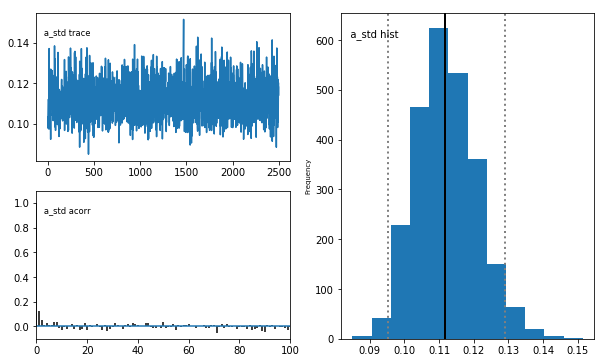

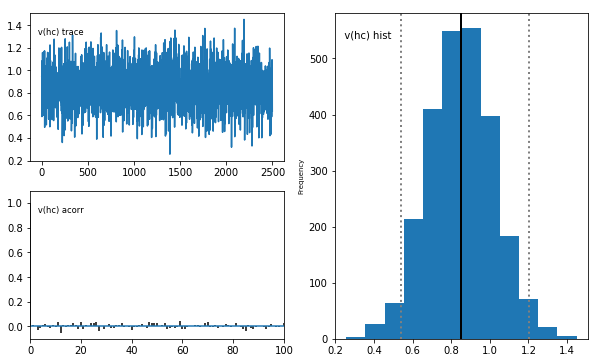

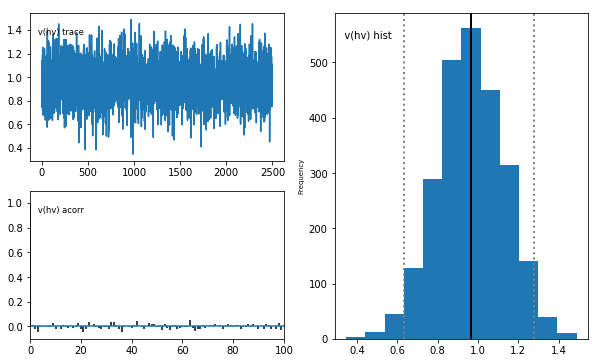

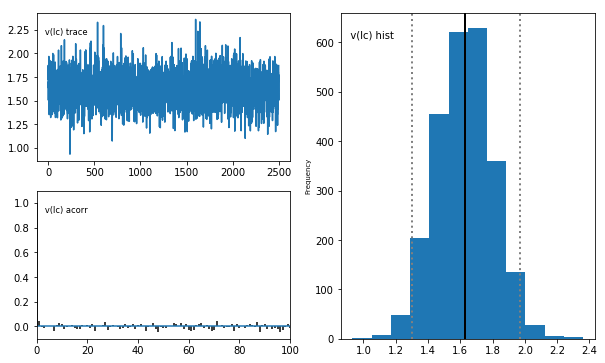

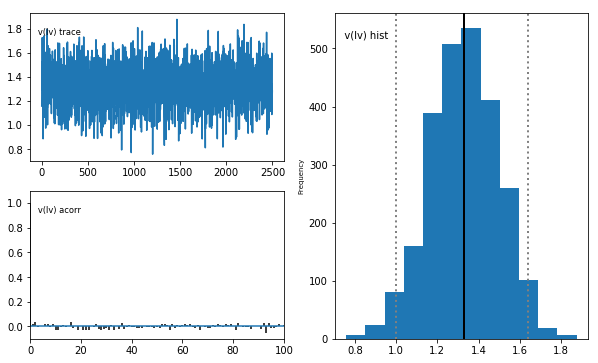

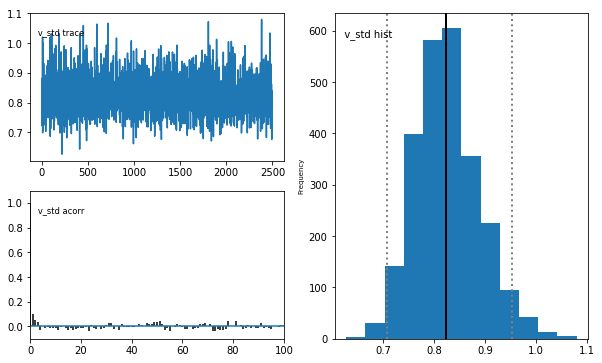

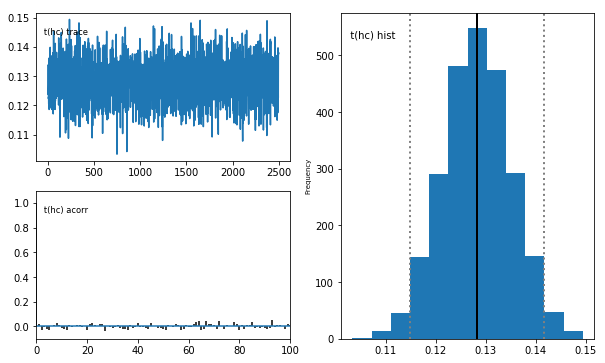

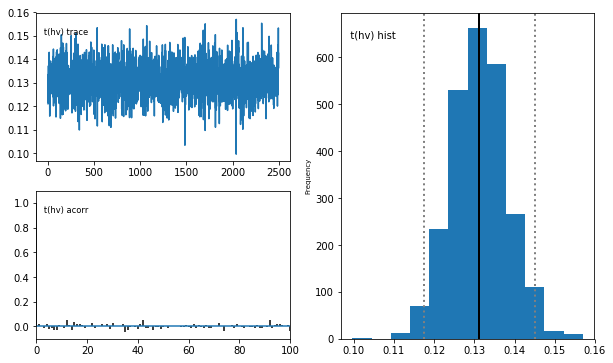

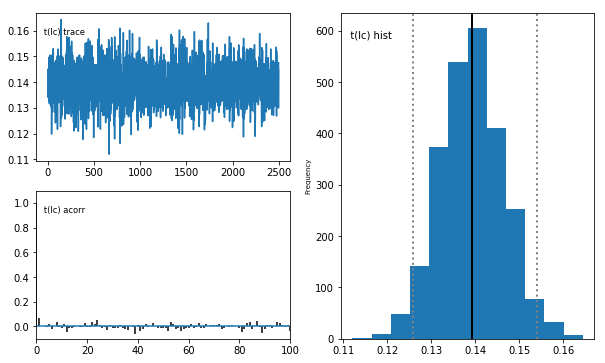

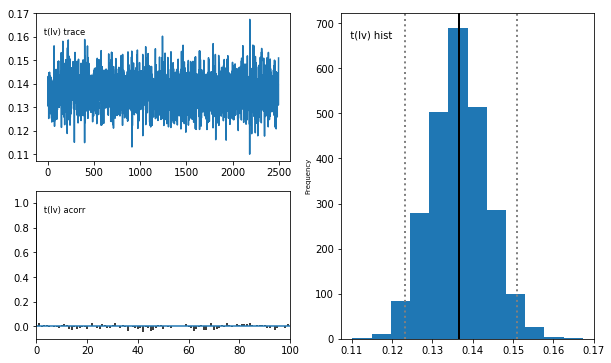

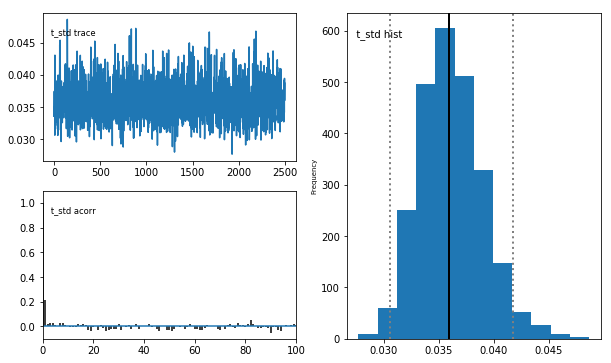

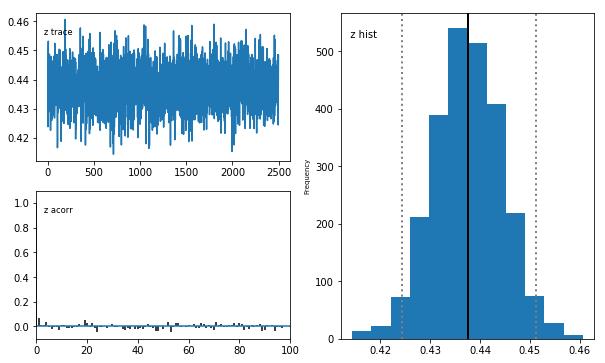

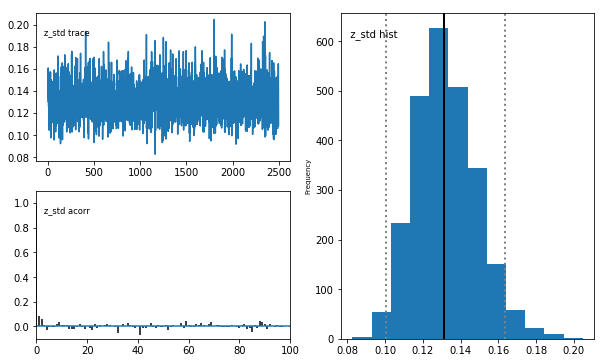

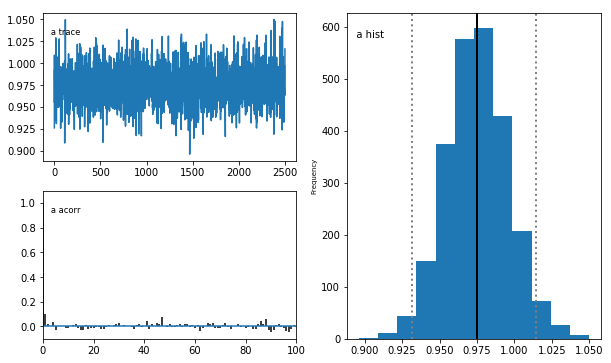

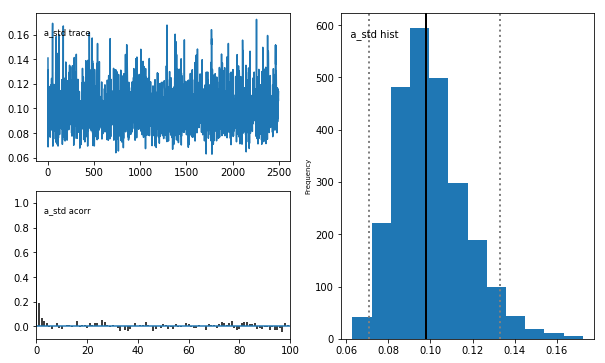

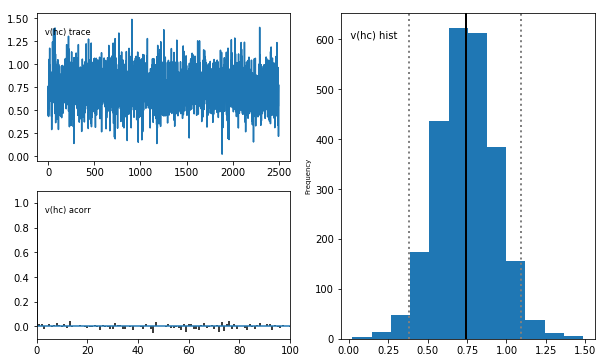

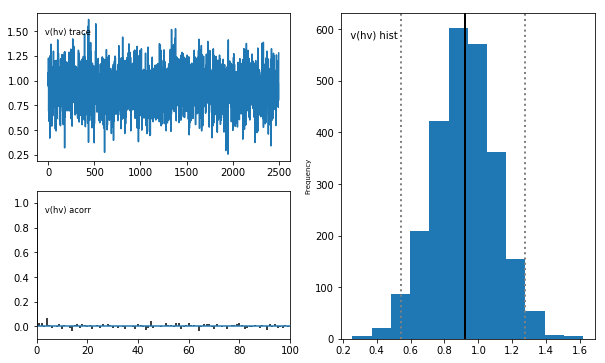

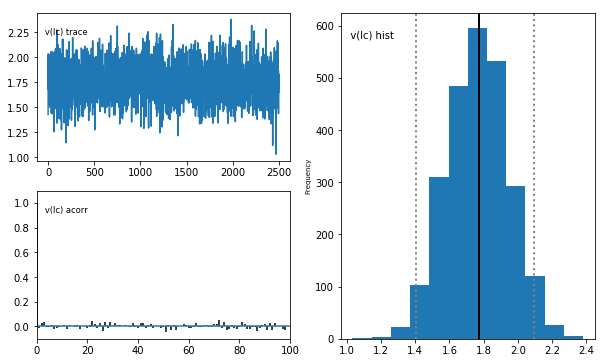

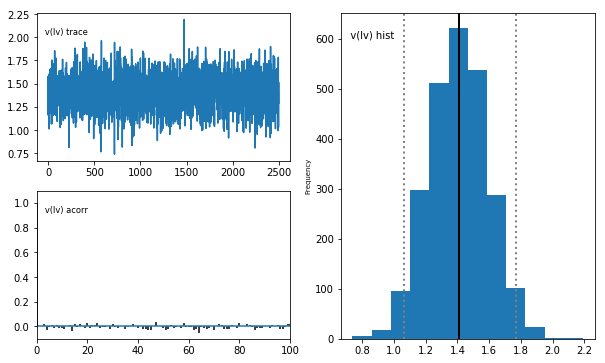

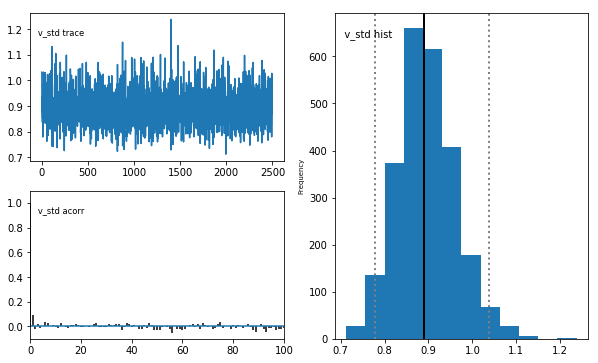

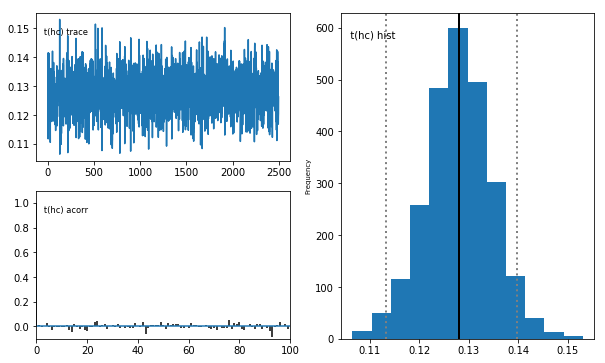

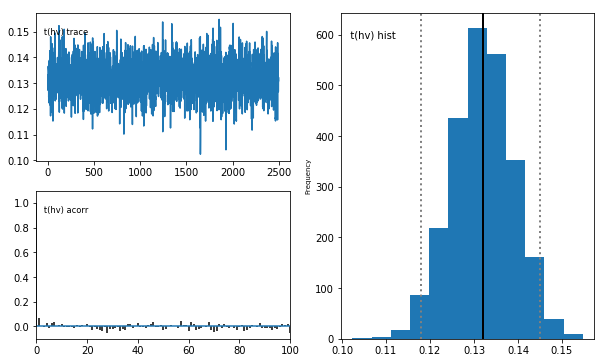

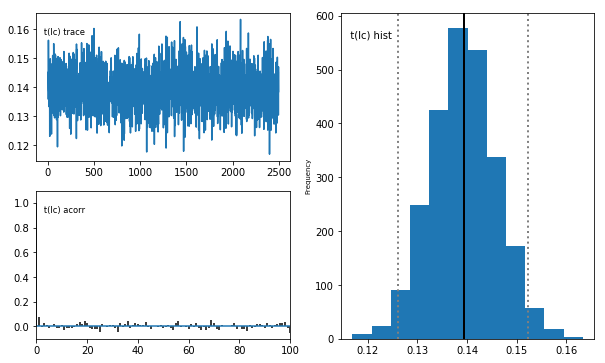

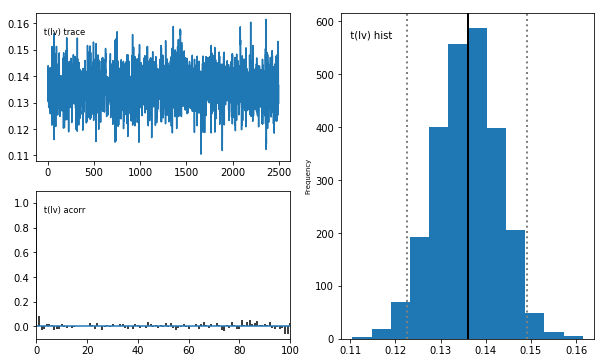

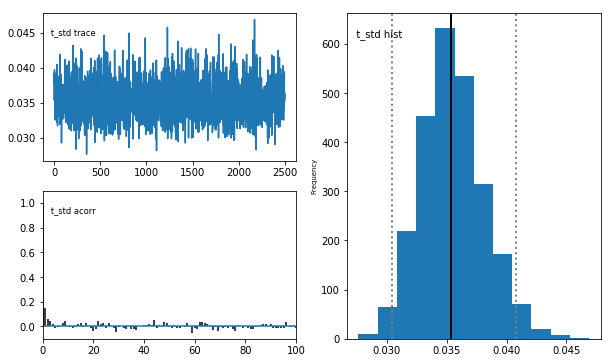

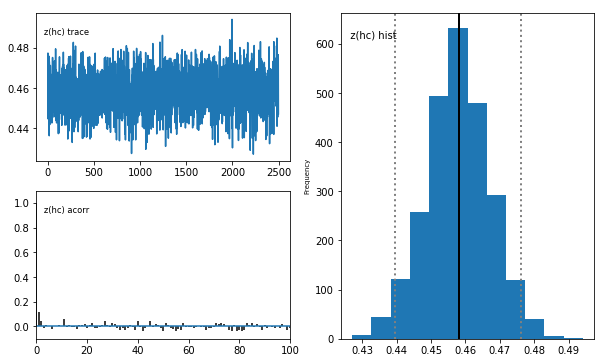

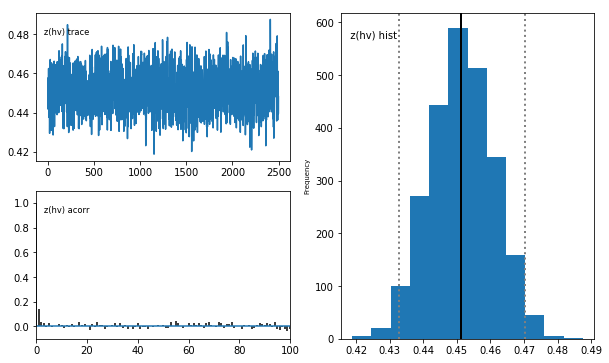

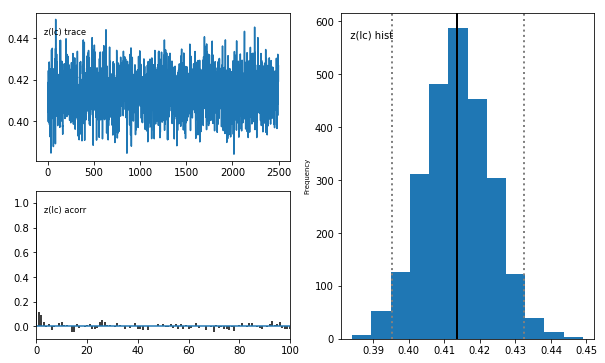

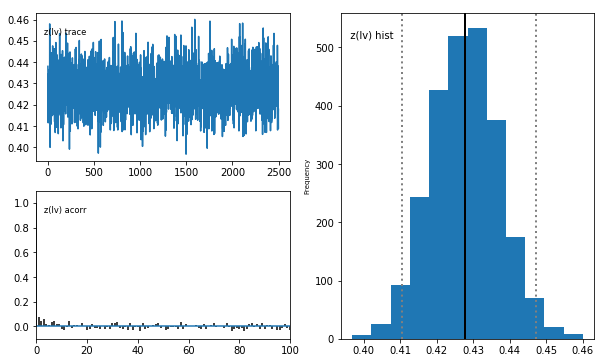

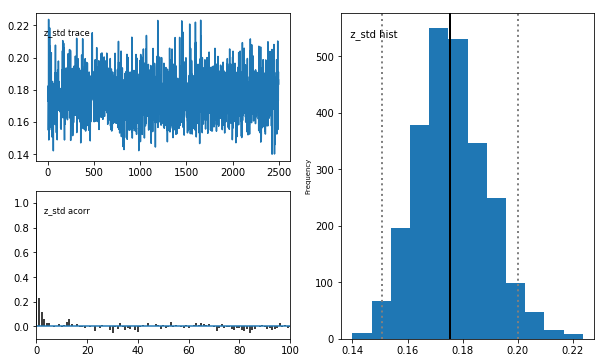

In [20]:
triple_param_model_names=['obs_a_v_tr', 'obs_z_v_tr']
parameters_triple_param=[{'a':'stim','v':'stim', 't':'stim'}, {'z':'stim', 'v':'stim','t':'stim'}]
dics_triple_param = []

#fit all parameters 
for model, parameter in zip(triple_param_model_names, parameters_triple_param):
    print(parameter)
    print('fitting ', model, ' model and saving to ', 
          model_dir+model)
    m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                        model_name=model, depends_on=parameter)
    dics_triple_param.append(m.dic)


In [23]:
triple_param_model_names_header = ', '.join(triple_param_model_names)
print_dics_triple_param = np.column_stack(dics_triple_param)
np.savetxt(write_dir+'obs_dics/triple_param_dics.csv', print_dics_triple_param, header=triple_param_model_names_header, delimiter=',',comments='')

In [24]:
triple_param_dic_dir = write_dir+'obs_dics/triple_param_dics.csv'
triple_param_dics = pd.read_csv(triple_param_dic_dir)
triple_param_dics.columns = triple_param_dics.columns.str.strip()

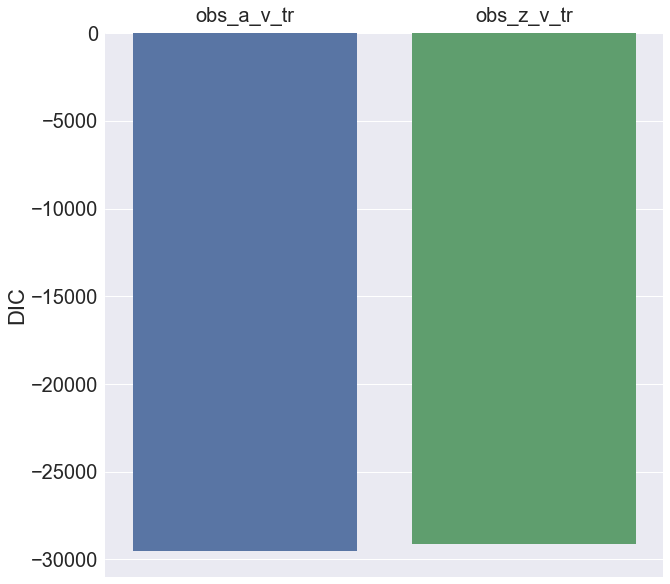

In [25]:
sns.set(font_scale=2)  
plt.figure(figsize=(10,10))
ax=sns.barplot(data=triple_param_dics, order=triple_param_model_names)
ax.set(ylabel='DIC')

# plt.ylim(-23000, -21900)
ax.xaxis.tick_top()
plt.show()

In [26]:
triple_param_dics

obs_a_v_tr    obs_z_v_tr
0 -29516.152122 -29105.265839

/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3000 of 3000 complete in 922.0 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


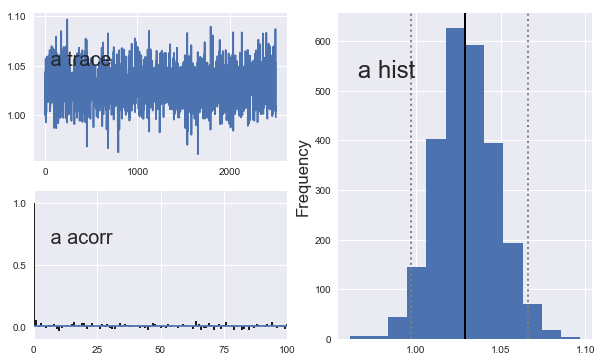

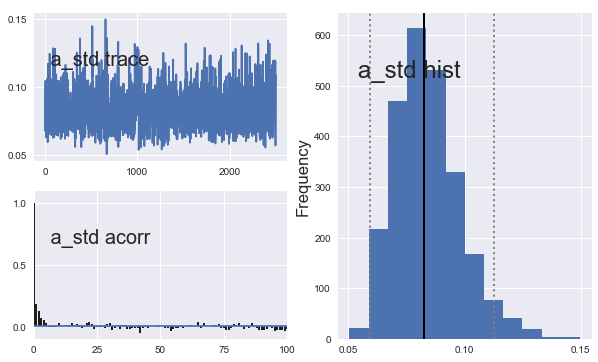

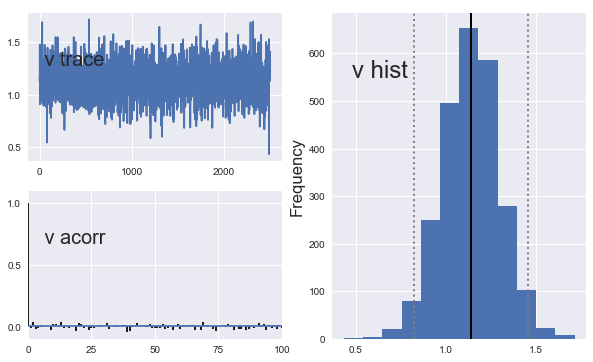

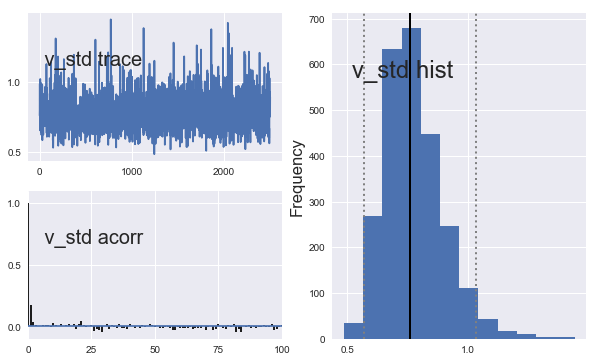

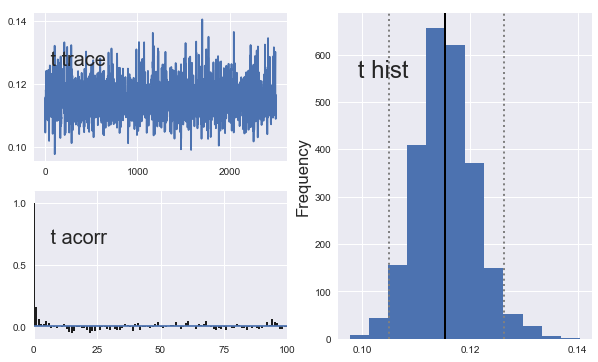

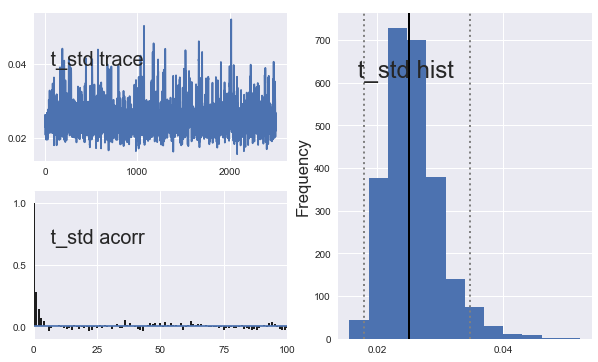

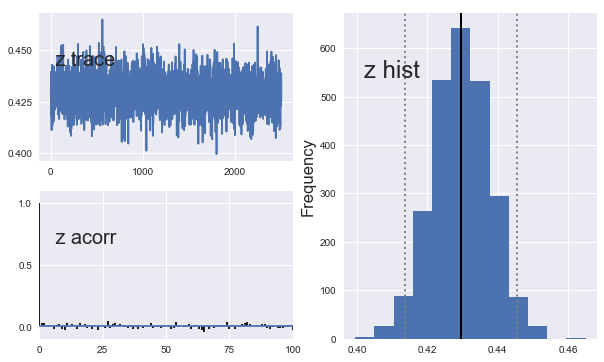

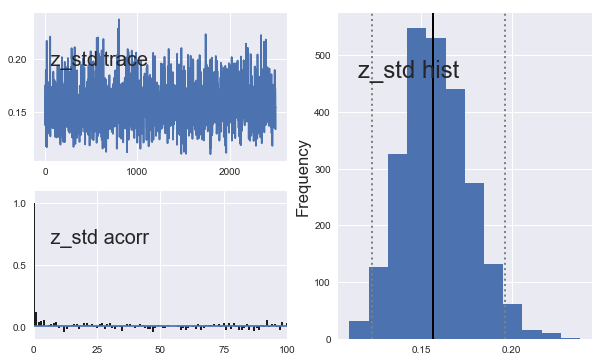

In [27]:
flat_dic = []
model_name = 'flat model'

m=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                    model_name=model_name)
flat_dic.append(m.dic)

In [28]:
np.savetxt(write_dir+'obs_dics/flat_model_dic.csv', flat_dic, header='flat_model', delimiter=',',comments='')

In [29]:
flat_model_dic_dir = write_dir+'obs_dics/flat_model_dic.csv'
flat_model_dic = pd.read_csv(flat_model_dic_dir)
flat_model_dic.columns = flat_model_dic.columns.str.strip()

In [57]:
all_dics = pd.concat([flat_model_dic, single_param_dics, dual_param_dics, triple_param_dics], axis=1)

In [58]:
all_dics

flat_model   obs_a_alone   obs_v_alone  obs_tr_alone   obs_z_alone  \
0 -18183.889954 -18803.562705 -19878.794561 -26556.035625 -18228.155716   

       obs_a_tr     obs_v_tr      obs_z_tr    obs_a_v_tr    obs_z_v_tr  
0 -27702.061693 -28743.07181 -26886.792236 -29516.152122 -29105.265839

In [1]:
# plotting_order =  triple_param_model_names + dual_param_model_names + model_names + ["flat_model"]

In [2]:
# sns.set(font_scale=5)  
# plt.figure(figsize=(60,30))
# ax=sns.barplot(data=all_dics, order=plotting_order)
# ax.set(ylabel='DIC')
# # plt.ylim(-18500, -5600)
# ax.xaxis.tick_top()
# plt.suptitle('Model fits for observed data')
# # plt.savefig(write_dir+'obs_stepwise_dics.pdf')

In [54]:
flat_normalized_dics=all_dics.div(all_dics.flat_model, axis=0) 
flat_subtracted_dics=all_dics.subtract(all_dics.flat_model, axis=0) 

In [56]:
flat_subtracted_dics

flat_model  obs_a_alone  obs_v_alone  obs_tr_alone  obs_z_alone  \
0         0.0  -619.672751 -1694.904607  -8372.145671   -44.265762   

      obs_a_tr      obs_v_tr     obs_z_tr    obs_a_v_tr    obs_z_v_tr  \
0 -9518.171739 -10559.181856 -8702.902282 -11332.262168 -10921.375885   

   obs_a_v_z_tr  
0 -11717.757163

In [3]:
# flat_norm_sub_plotting_order =  triple_param_model_names + dual_param_model_names + model_names 
# sns.set(font_scale=5)  
# plt.figure(figsize=(60,30))
# ax=sns.barplot(data=flat_normalized_dics, order=flat_norm_sub_plotting_order)
# ax.set(ylabel='normalized DIC')
# # plt.ylim(-18500, -5600)
# ax.xaxis.tick_top()
# plt.suptitle('Model fits for observed data')
# # plt.savefig(write_dir+'obs_stepwise_dics_norm.pdf')

In [ ]:
# flat_subtracted_dics = flat_subtracted_dics.drop('a_z_tr', axis=1)
flat_subtracted_plotting_order = ['a_v_tr', 'a_z_tr'] + dual_param_model_names + model_names 


In [ ]:
#need also z_v_tr. 
sns.set(font_scale=5)  
plt.figure(figsize=(60,30))
ax=sns.barplot(data=flat_subtracted_dics, order=flat_subtracted_plotting_order)
ax.set(ylabel='flat-subtracted DIC')
# plt.ylim(-18500, -5600)
ax.xaxis.tick_top()
plt.suptitle('Model fits for observed data')
# plt.savefig(write_dir+'obs_stepwise_dics_subtracted.pdf')

## plot the posteriors for the winning model 

In [ ]:
worst_model, winning_model = all_dics.idxmax(axis=1)[0], all_dics.idxmin(axis=1)[0]

print('worst_model: ', worst_model, '\nwinning_model: ', winning_model)

/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1933: RuntimeWarning: invalid value encountered in absolute
  tmp2 = numpy.abs(tmp2)
/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3001 of 3000 complete in 992.0 sec

/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting a(hc)
Plotting a(hv)
Plotting a(lc)
Plotting a(lv)
Plotting a_std
Plotting v(hc)
Plotting v(hv)
Plotting v(lc)
Plotting v(lv)
Plotting v_std
Plotting t(hc)
Plotting t(hv)
Plotting t(lc)
Plotting t(lv)
Plotting t_std
Plotting z
Plotting z_std


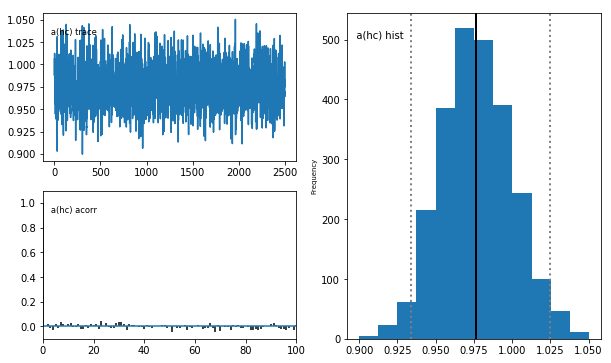

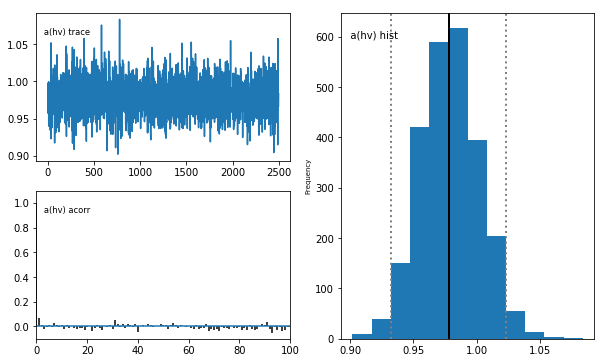

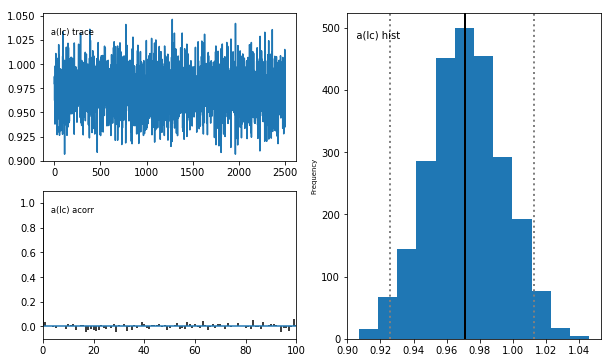

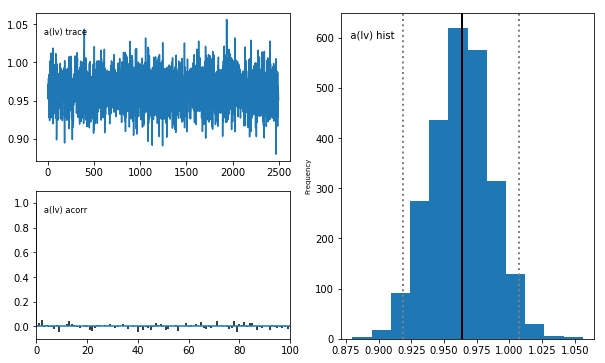

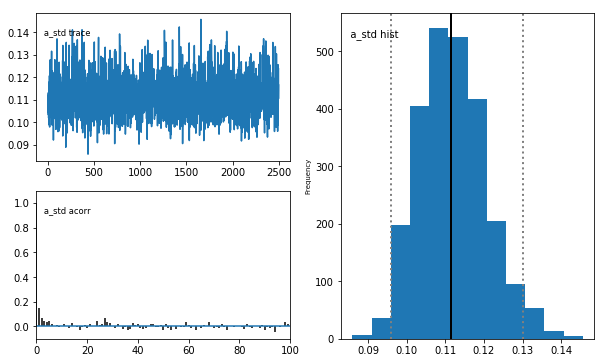

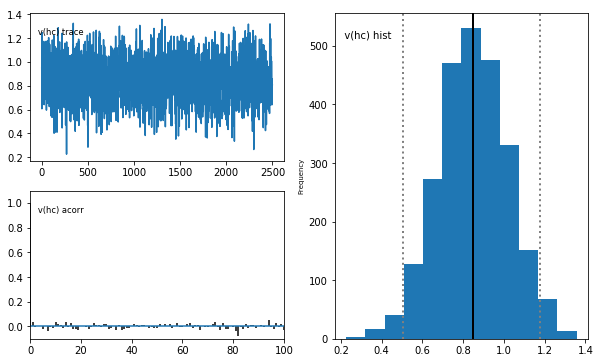

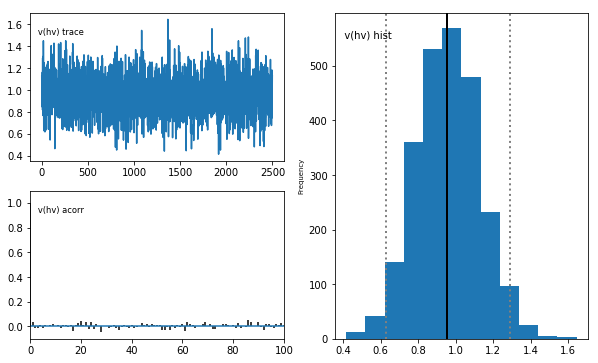

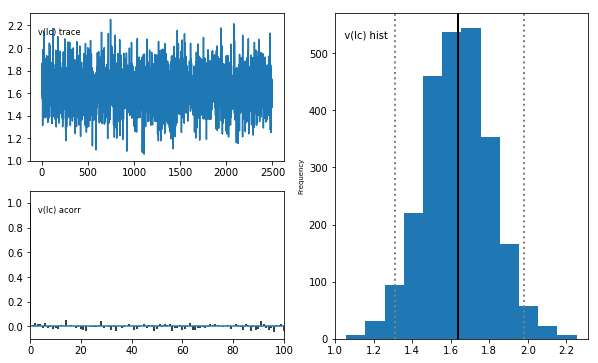

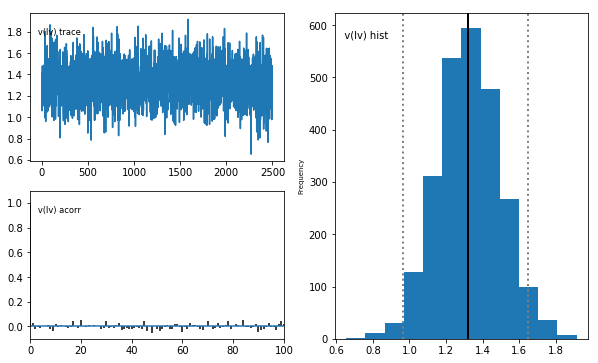

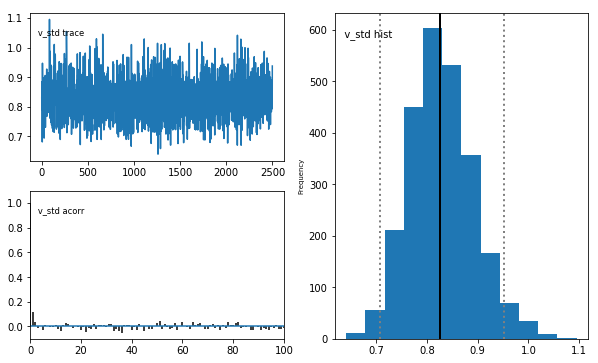

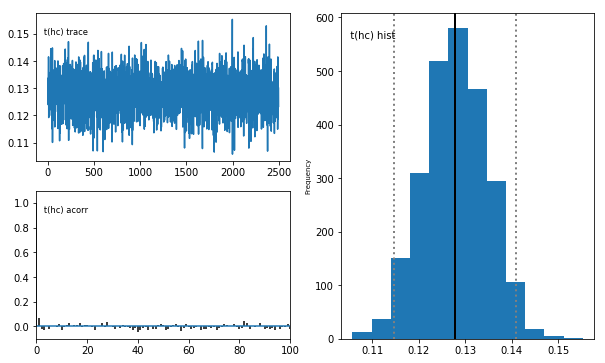

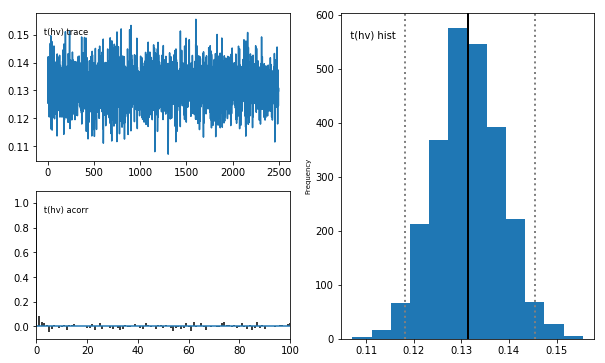

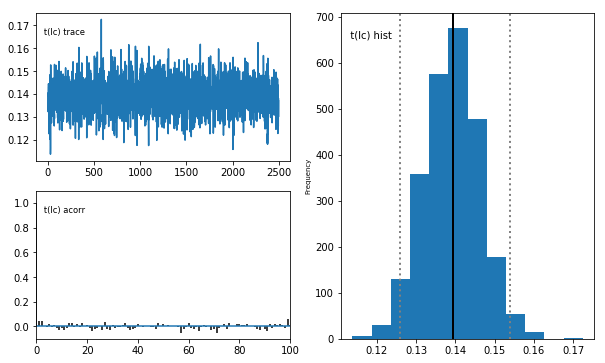

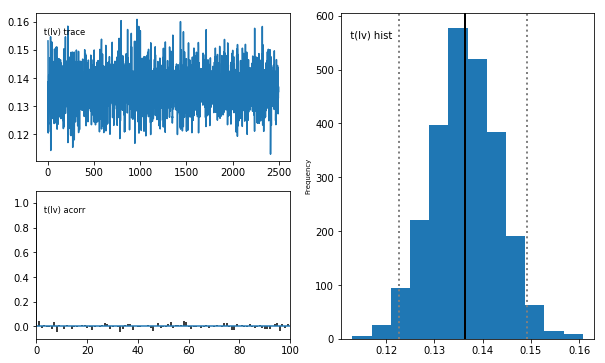

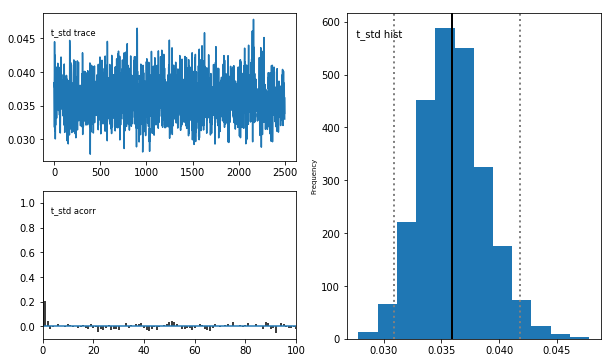

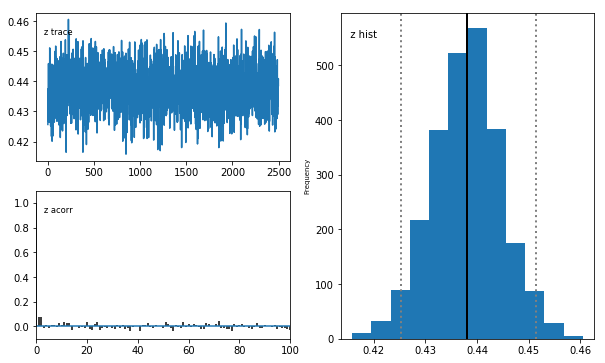

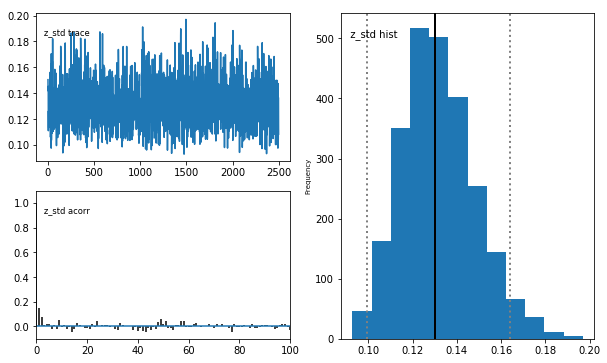

In [10]:
#save traces for the winning model
# winning_model_name = [winning_model]
winning_model_name = ['obs_a_v_tr_traces_winning']

winning_model=estimate_ddm_params(processed_df=processed_df, write_dir=model_dir, 
                    model_name=winning_model_name[0], depends_on={'a':'stim','v':'stim', 't':'stim'},
                                  save_traces=True,save_plots=False, save_stats=False)

In [12]:
winning_model.save(write_dir + winning_model_name[0])

In [13]:
winning_model=hddm.load(write_dir+winning_model_name[0])

### drift rate 

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))
v_hc, v_hv, v_lc, v_lv = winning_model.nodes_db.ix[['v(hc)', 'v(hv)', 'v(lc)', 'v(lv)'], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.savefig(write_dir+'obs_drift_posterior_best_model.pdf')

### threshold

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))

a_hc, a_hv, a_lc, a_lv = winning_model.nodes_db.ix[['a(hc)', 'a(hv)', 'a(lc)', 'a(lv)'], 'node']


threshold_fig=hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])
plt.xlabel('decision threshold')
plt.ylabel('Posterior probability')
plt.savefig(write_dir+'obs_threshold_posterior_best_model.pdf')

### non-decision time

In [ ]:
sns.set(font_scale=1.2)  
plt.figure(figsize=(60,30))

tr_hc, tr_hv, tr_lc, tr_lv = winning_model.nodes_db.ix[['t(hc)', 't(hv)', 't(lc)', 't(lv)'], 'node']


ndt_fig=hddm.analyze.plot_posterior_nodes([tr_hc, tr_hv, tr_lc, tr_lv])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.savefig(write_dir+'obs_ndt_posterior_best_model.pdf')